In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### In this file, we aims to perform the EDA. You may notice it contains some code for preprocessing and feature engineering with auxiliary datasets. However, they are only used to prepare a dataset for EDA, the actual preprocessing and feature engineering with auxiliary datasets can be found in other files (the steps are same.)

In [2]:
df_train = pd.read_csv('cs5228-202223-s2-location-location-location/train.csv')

## Preparing a dataset for EDA

In [3]:
#preprocessing before EDA
df_train = df_train.drop(columns=['eco_category', 'elevation'])

In [4]:
# "2001-08" -> int(200108)
def process_storey_range(storey):
    storey_list = storey.split()
    res = (int(storey_list[0]) + int(storey_list[2]))/2
    return res

In [5]:
df_train

month           town flat_type block            street_name  \
0       2001-08      pasir ris    4 room   440      pasir ris drive 4   
1       2014-10        punggol    5-room  196B          punggol field   
2       2020-09       sengkang    5 room  404A          fernvale lane   
3       2000-10       clementi    3 room   375      clementi avenue 4   
4       2013-01    bukit batok    3-room   163  bukit batok street 11   
...         ...            ...       ...   ...                    ...   
431727  2005-03      woodlands    4 room   537     Woodlands Drive 16   
431728  2016-04       sengkang    4 room  410A          fernvale road   
431729  2011-01       tampines    3-room   829     tampines street 81   
431730  2013-05       sengkang    5-room   233       compassvale walk   
431731  2007-08  choa chu kang    4 room   121         Teck Whye Lane   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
0          01 to 03           118.0            model a                 1989   
1          10 to 12           110.0           improved                 2003   
2          01 to 03           112.0  premium apartment                 2004   
3          07 to 09            67.0     new generation                 1980   
4          07 to 09            73.0            model a                 1985   
...             ...             ...                ...                  ...   
431727     01 to 03           101.0            model a                 2000   
431728     13 to 15            95.0  premium apartment                 2012   
431729     01 to 03            67.0     new generation                 1986   
431730     16 to 18           123.0           improved                 1999   
431731     01 to 03           104.0            model a                 1989   

        latitude   longitude               subzone  planning_area  \
0       1.369008  103.958697       pasir ris drive      pasir ris   
1       1.399007  103.906991         punggol field        punggol   
2       1.388348  103.873815              fernvale       sengkang   
3       1.318493  103.766702        clementi north       clementi   
4       1.348149  103.742658      bukit batok west    bukit batok   
...          ...         ...                   ...            ...   
431727  1.429658  103.792583       woodlands south      woodlands   
431728  1.390053  103.875941              fernvale       sengkang   
431729  1.349224  103.934913         tampines west       tampines   
431730  1.389941  103.900721  sengkang town centre       sengkang   
431731  1.378304  103.750108             teck whye  choa chu kang   

                   region  resale_price  
0             east region      209700.0  
1       north-east region      402300.0  
2       north-east region      351000.0  
3             west region      151200.0  
4             west region      318600.0  
...                   ...           ...  
431727       north region      238500.0  
431728  north-east region      376200.0  
431729        east region      255600.0  
431730  north-east region      508500.0  
431731        west region      162000.0  

[431732 rows x 15 columns]

In [6]:
df_train['storey_range'].unique()

array(['01 to 03', '10 to 12', '07 to 09', '13 to 15', '16 to 18',
       '04 to 06', '22 to 24', '01 to 05', '19 to 21', '11 to 15',
       '06 to 10', '25 to 27', '31 to 33', '28 to 30', '37 to 39',
       '34 to 36', '21 to 25', '16 to 20', '40 to 42', '46 to 48',
       '43 to 45', '26 to 30', '36 to 40', '31 to 35', '49 to 51'],
      dtype=object)

In [7]:
df_train2 = df_train.copy()

n = df_train.shape[0]
for i in range(n):
    df_train2.iloc[i, 5] = process_storey_range(df_train.iloc[i, 5])

df_train2
df_train2['storey_range'] = df_train2['storey_range'].astype('float')

## Feature engineering with auxiliary data

In [8]:
df_com = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-commerical-centres.csv')
df_com.head()

name type       lat         lng
0  Central Business District   CR  1.286768  103.854529
1       Jurong Lake District   CR  1.334085  103.734513
2    Seletar Regional Centre   CR  1.409435  103.866820
3   Tampines Regional Centre   CR  1.353180  103.945188
4  Woodlands Regional Centre   CR  1.436748  103.786485

In [9]:
df_com['type'].unique()

array(['CR', 'IEBP', 'IEPB', 'BN', 'IHL'], dtype=object)

In [10]:
# for training set
# 1 latitude and 1 longitude both rougly equal to 111km
# so the 1km is roughly equal to 0.009 latitude or longitude

df_train3 = df_train2.copy()

n = df_train3.shape[0]

for t in df_com['type'].unique():
    a = df_com[df_com['type']==t]['lat'].to_numpy()
    b = df_com[df_com['type']==t]['lng'].to_numpy()
    for i in range(n):
        x = df_train3.loc[i,'latitude']
        y = df_train3.loc[i,'longitude']
        dis = np.sqrt((a-x)**2+(b-y)**2)
        counter_3 = dis[dis<=0.027].size
        counter_5 = dis[dis<=0.045].size
        new_type_3 = 'com_' + str(t) + '_3'
        new_type_5 = 'com_' + str(t) + '_5'
        df_train3.loc[i, new_type_3] = counter_3
        df_train3.loc[i, new_type_5] = counter_5
        
print('Done!')

Done!


In [11]:
df_train3.head()

month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   com_CR_3 com_CR_5 com_IEBP_3 com_IEBP_5  com_IEPB_3  com_IEPB_5  com_BN_3  \
0       1.0      1.0        1.0        5.0         0.0         0.0       0.0   
1       0.0      1.0        2.0        4.0         0.0         0.0       0.0   
2       1.0      1.0        2.0        4.0         0.0         1.0       0.0   
3       0.0      1.0        1.0        4.0         0.0         0.0       1.0   
4       1.0      1.0        1.0        1.0         0.0         0.0       0.0   

   com_BN_5  com_IHL_3  com_IHL_5  
0       0.0        0.0        1.0  
1       0.0        0.0        0.0  
2       1.0        0.0        0.0  
3       1.0        2.0        2.0  
4       0.0        0.0        0.0  

[5 rows x 25 columns]

In [12]:
df_pri_scl = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-primary-schools.csv')
df_pri_scl

name       lat         lng
0        Admiralty Primary School  1.442941  103.800345
1    Ahmad Ibrahim Primary School  1.433849  103.832710
2                  Ai Tong School  1.360713  103.833018
3        Alexandra Primary School  1.291284  103.824066
4     Anchor Green Primary School  1.390380  103.887354
..                            ...       ...         ...
186          Yuhua Primary School  1.342891  103.740960
187          Yumin Primary School  1.351264  103.950874
188        Zhangde Primary School  1.284250  103.826082
189       Zhenghua Primary School  1.379424  103.769676
190       Zhonghua Primary School  1.359911  103.869710

[191 rows x 3 columns]

In [13]:
# for the main df and a auxiliary df, automatically calculate the number of centres in 1 and 3 km.
def count_centres_in_1_3(df_main, df_help, new_column_name):
    n = df_main.shape[0]
    a = df_help['lat'].to_numpy()
    b = df_help['lng'].to_numpy()
    for i in range(n):
        x = df_main.loc[i,'latitude']
        y = df_main.loc[i,'longitude']
        dis = np.sqrt((a-x)**2+(b-y)**2)
        counter_1 = dis[dis<0.009].size
        counter_3 = dis[dis<0.027].size
        new_type_1 = new_column_name +'_1'
        new_type_3 = new_column_name +'_3'
        df_main.loc[i, new_type_1] = counter_1
        df_main.loc[i, new_type_3] = counter_3
    print('Done!')
    return df_main

In [14]:
df_train4 = df_train3.copy()
df_train4 = count_centres_in_1_3(df_train4, df_pri_scl, 'pri_scl')
df_train4.head()

Done!


month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   com_IEBP_3 com_IEBP_5 com_IEPB_3 com_IEPB_5  com_BN_3  com_BN_5  com_IHL_3  \
0         1.0        5.0        0.0        0.0       0.0       0.0        0.0   
1         2.0        4.0        0.0        0.0       0.0       0.0        0.0   
2         2.0        4.0        0.0        1.0       0.0       1.0        0.0   
3         1.0        4.0        0.0        0.0       1.0       1.0        2.0   
4         1.0        1.0        0.0        0.0       0.0       0.0        0.0   

   com_IHL_5  pri_scl_1  pri_scl_3  
0        1.0        5.0       16.0  
1        0.0        8.0       20.0  
2        0.0        2.0       17.0  
3        2.0        2.0        9.0  
4        0.0        2.0       13.0  

[5 rows x 27 columns]

In [15]:
df_sec_scl = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-secondary-schools.csv')
df_sec_scl.head()

name       lat         lng
0          Admiralty Secondary School  1.445912  103.802908
1      Ahmad Ibrahim Secondary School  1.436095  103.830055
2           Anderson Secondary School  1.375417  103.851723
3                Anglican High School  1.330218  103.941759
4  Anglo-Chinese School (Barker Road)  1.319709  103.835661

In [16]:
df_train5 = df_train4.copy()
df_train5 = count_centres_in_1_3(df_train5, df_sec_scl, 'sec_scl')
df_train5.head()

Done!


month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   com_IEPB_3 com_IEPB_5 com_BN_3 com_BN_5  com_IHL_3  com_IHL_5  pri_scl_1  \
0         0.0        0.0      0.0      0.0        0.0        1.0        5.0   
1         0.0        0.0      0.0      0.0        0.0        0.0        8.0   
2         0.0        1.0      0.0      1.0        0.0        0.0        2.0   
3         0.0        0.0      1.0      1.0        2.0        2.0        2.0   
4         0.0        0.0      0.0      0.0        0.0        0.0        2.0   

   pri_scl_3  sec_scl_1  sec_scl_3  
0       16.0        4.0        8.0  
1       20.0        6.0       11.0  
2       17.0        1.0       10.0  
3        9.0        2.0       11.0  
4       13.0        2.0       13.0  

[5 rows x 29 columns]

In [17]:
df_shop = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-shopping-malls.csv')
df_shop.head()

name       lat         lng wikipedia_link
0                          100 AM  1.275012  103.841372            NaN
1                    313@Somerset  1.301013  103.838540            NaN
2                          Aperia  1.309714  103.863837            NaN
3  Balestier Hill Shopping Centre  1.325442  103.842521            NaN
4                      Bugis Cube  1.298276  103.855555            NaN

In [18]:
df_train6 = df_train5.copy()
df_train6 = count_centres_in_1_3(df_train6, df_shop, 'shop')
df_train6.head()

Done!


month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   com_BN_3 com_BN_5 com_IHL_3 com_IHL_5  pri_scl_1  pri_scl_3  sec_scl_1  \
0       0.0      0.0       0.0       1.0        5.0       16.0        4.0   
1       0.0      0.0       0.0       0.0        8.0       20.0        6.0   
2       0.0      1.0       0.0       0.0        2.0       17.0        1.0   
3       1.0      1.0       2.0       2.0        2.0        9.0        2.0   
4       0.0      0.0       0.0       0.0        2.0       13.0        2.0   

   sec_scl_3  shop_1  shop_3  
0        8.0     0.0     8.0  
1       11.0     4.0     6.0  
2       10.0     2.0     8.0  
3       11.0     3.0    11.0  
4       13.0     1.0     7.0  

[5 rows x 31 columns]

In [19]:
df_hawker = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-gov-markets-hawker-centres.csv')
df_hawker.head()

name       lat         lng
0                     East Coast Lagoon Food Village  1.307730  103.934303
1                          Jurong West Hawker Centre  1.341223  103.697374
2  Bukit Merah View Blk 115 (Blk 115 Bukit Merah ...  1.285240  103.822372
3  Geylang Bahru Blk 69 (Blk 69 Geylang Bahru Mar...  1.321530  103.870071
4                               Ghim Moh Road Blk 20  1.311060  103.788292

In [20]:
df_train7 = df_train6.copy()
df_train7 = count_centres_in_1_3(df_train7, df_hawker, 'hawker')
df_train7.head()

Done!


month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   com_IHL_3 com_IHL_5 pri_scl_1 pri_scl_3  sec_scl_1  sec_scl_3  shop_1  \
0        0.0       1.0       5.0      16.0        4.0        8.0     0.0   
1        0.0       0.0       8.0      20.0        6.0       11.0     4.0   
2        0.0       0.0       2.0      17.0        1.0       10.0     2.0   
3        2.0       2.0       2.0       9.0        2.0       11.0     3.0   
4        0.0       0.0       2.0      13.0        2.0       13.0     1.0   

   shop_3  hawker_1  hawker_3  
0     8.0       1.0       2.0  
1     6.0       0.0       0.0  
2     8.0       0.0       5.0  
3    11.0       2.0       8.0  
4     7.0       1.0       4.0  

[5 rows x 33 columns]

In [21]:
df_station = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-train-stations.csv')
df_station.head()

name codes       lat         lng  opening_year type
0           Eunos   EW7  1.319778  103.903252        1989.0  mrt
1  Chinese Garden  EW25  1.342352  103.732596        1988.0  mrt
2          Khatib  NS14  1.417383  103.832980        1988.0  mrt
3          Kranji   NS7  1.425177  103.762165        1996.0  mrt
4         Redhill  EW18  1.289562  103.816816        1988.0  mrt

In [22]:
# if there is any station have not opened yet
df_station[df_station['opening_year']>2022]

name codes       lat         lng  opening_year type
57  Riviera   PE4  1.394524  103.916166        2031.0  mrt

In [23]:
# only consider those opened station, so filtering
df_station = df_station[(df_station['opening_year']<=2023) | (df_station['opening_year'].isnull())]
df_station.head()

name codes       lat         lng  opening_year type
0           Eunos   EW7  1.319778  103.903252        1989.0  mrt
1  Chinese Garden  EW25  1.342352  103.732596        1988.0  mrt
2          Khatib  NS14  1.417383  103.832980        1988.0  mrt
3          Kranji   NS7  1.425177  103.762165        1996.0  mrt
4         Redhill  EW18  1.289562  103.816816        1988.0  mrt

In [24]:
# preprocess the train statioin dataframe
# add a new column 'weight' based on the number of lines e.g. 'EW8/CC9' count for 2 and 'EW20' count for 1
weights = []
for i in range(df_station.shape[0]):
    codes = df_station.iloc[i, 1]
    weights.append(len(codes.split('/')))
df_station.loc[:,'weight'] = weights
print('Done!')
df_station.head()

Done!


name codes       lat         lng  opening_year type  weight
0           Eunos   EW7  1.319778  103.903252        1989.0  mrt       1
1  Chinese Garden  EW25  1.342352  103.732596        1988.0  mrt       1
2          Khatib  NS14  1.417383  103.832980        1988.0  mrt       1
3          Kranji   NS7  1.425177  103.762165        1996.0  mrt       1
4         Redhill  EW18  1.289562  103.816816        1988.0  mrt       1

In [25]:
# for the main df and a train station df, automatically calculate the number of lines in 1 and 3 km.

def count_centres_with_weight(df_main, df_help, new_column_name):
    n = df_main.shape[0]
    a = df_help['lat'].to_numpy()
    b = df_help['lng'].to_numpy()
    for i in range(n):
        # calculate the distance based on latitude and longitude
        x = df_main.loc[i,'latitude']
        y = df_main.loc[i,'longitude']
        dis = np.sqrt((a-x)**2+(b-y)**2)
        # number of centres in 1km and 3km
        counter_1 = dis[dis<0.009].size
        counter_3 = dis[dis<0.027].size
        # new columns' name
        new_type_1 = new_column_name +'_1'
        new_type_3 = new_column_name +'_3'
        # get the corresponding weights
        sort_list = np.argsort(dis)
        weight_list_1 = df_help['weight'].to_numpy()[sort_list[:counter_1]]
        weight_list_3 = df_help['weight'].to_numpy()[sort_list[:counter_3]]
        
        df_main.loc[i, new_type_1] = np.sum(weight_list_1)
        df_main.loc[i, new_type_3] = np.sum(weight_list_3)
    print('Done!')
    return df_main

In [26]:
df_train8 = df_train7.copy()
df_train8 = count_centres_with_weight(df_train8, df_station, 'station')
df_train8.head()

Done!


month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   pri_scl_1 pri_scl_3 sec_scl_1 sec_scl_3  shop_1  shop_3  hawker_1  \
0        5.0      16.0       4.0       8.0     0.0     8.0       1.0   
1        8.0      20.0       6.0      11.0     4.0     6.0       0.0   
2        2.0      17.0       1.0      10.0     2.0     8.0       0.0   
3        2.0       9.0       2.0      11.0     3.0    11.0       2.0   
4        2.0      13.0       2.0      13.0     1.0     7.0       1.0   

   hawker_3  station_1  station_3  
0       2.0        0.0        5.0  
1       0.0        9.0       28.0  
2       5.0        2.0       13.0  
3       8.0        1.0        6.0  
4       4.0        1.0        6.0  

[5 rows x 35 columns]

In [27]:
df_population = pd.read_csv('cs5228-202223-s2-location-location-location/auxiliary-data/sg-population-demographics.csv')
df_population.head()

plannin_area                 subzone age_group sex  count
0   ang mo kio  ang mo kio town centre       0-4   m    130
1   ang mo kio               cheng san       0-4   m    670
2   ang mo kio              chong boon       0-4   m    460
3   ang mo kio             kebun bahru       0-4   m    380
4   ang mo kio         sembawang hills       0-4   m     90

In [28]:
# count a dict mapping from 'planning_area' to population in specific gender 
def count_population_area(df, gender, norm=False):
    # gender: 'm' or 'f'
    res = {}
    for t in df['plannin_area'].unique():
        count_pop = df[(df['plannin_area']==t) & (df['sex']==gender)]['count'].sum()
        num = len(df[(df['plannin_area']==t)]['subzone'].unique())
        if norm: 
            res[t] = count_pop / num
        else:
            res[t] = count_pop
    print('Done!')
    return res

In [29]:
pop_m = count_population_area(df_population, 'm', True)
pop_f = count_population_area(df_population, 'f', True)

Done!
Done!


In [30]:
# add columns 'pop_m' and 'pop_f' to the main dataset based on the planning_area
df_train9 = df_train8.copy()

males = []
females = []
for i in range(df_train9.shape[0]):
    males.append(pop_m[df_train9['planning_area'][i]])
    females.append(pop_f[df_train9['planning_area'][i]])

if len(males) == len(females) and len(males) == df_train9.shape[0]:
    df_train9['pop_m'] = males
    df_train9['pop_f'] = females
    print('Done!')
    
df_train9.head()

Done!


month         town flat_type block            street_name  storey_range  \
0  2001-08    pasir ris    4 room   440      pasir ris drive 4           2.0   
1  2014-10      punggol    5-room  196B          punggol field          11.0   
2  2020-09     sengkang    5 room  404A          fernvale lane           2.0   
3  2000-10     clementi    3 room   375      clementi avenue 4           8.0   
4  2013-01  bukit batok    3-room   163  bukit batok street 11           8.0   

   floor_area_sqm         flat_model  lease_commence_date  latitude  ...  \
0           118.0            model a                 1989  1.369008  ...   
1           110.0           improved                 2003  1.399007  ...   
2           112.0  premium apartment                 2004  1.388348  ...   
3            67.0     new generation                 1980  1.318493  ...   
4            73.0            model a                 1985  1.348149  ...   

   sec_scl_1 sec_scl_3 shop_1 shop_3  hawker_1  hawker_3  station_1  \
0        4.0       8.0    0.0    8.0       1.0       2.0        0.0   
1        6.0      11.0    4.0    6.0       0.0       0.0        9.0   
2        1.0      10.0    2.0    8.0       0.0       5.0        2.0   
3        2.0      11.0    3.0   11.0       2.0       8.0        1.0   
4        2.0      13.0    1.0    7.0       1.0       4.0        1.0   

   station_3         pop_m         pop_f  
0        5.0   9885.714286  10110.000000  
1       28.0  10828.000000  11136.000000  
2       13.0  20372.000000  20974.000000  
3        6.0   6275.714286   6828.571429  
4        6.0   8586.250000   8841.250000  

[5 rows x 37 columns]

## Overview of dataset (EDA starts here)

In [31]:
df_train9.describe()

storey_range  floor_area_sqm  lease_commence_date       latitude  \
count  431732.000000   431732.000000        431732.000000  431732.000000   
mean        7.741643       96.970064          1989.421004       1.364939   
std         4.854703       25.190664            10.254055       0.042829   
min         2.000000       31.000000          1966.000000       1.270380   
25%         5.000000       74.000000          1983.000000       1.336154   
50%         8.000000       99.000000          1988.000000       1.358958   
75%        11.000000      114.000000          1997.000000       1.389004   
max        50.000000      280.000000          2019.000000       1.457071   

           longitude  resale_price       com_CR_3       com_CR_5  \
count  431732.000000  4.317320e+05  431732.000000  431732.000000   
mean      103.836492  3.018196e+05       0.338699       0.739531   
std         0.073527  1.298623e+05       0.473268       0.456873   
min       103.685228  2.970000e+04       0.000000       0.000000   
25%       103.772439  2.052000e+05       0.000000       0.000000   
50%       103.840160  2.839500e+05       0.000000       1.000000   
75%       103.895779  3.735000e+05       1.000000       1.000000   
max       103.987805  1.123200e+06       1.000000       2.000000   

          com_IEBP_3     com_IEBP_5  ...      sec_scl_1      sec_scl_3  \
count  431732.000000  431732.000000  ...  431732.000000  431732.000000   
mean        0.728746       2.005429  ...       2.299355      11.586646   
std         0.817378       1.392136  ...       1.275038       3.504203   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       1.000000  ...       1.000000       9.000000   
50%         1.000000       2.000000  ...       2.000000      12.000000   
75%         1.000000       3.000000  ...       3.000000      14.000000   
max         4.000000       5.000000  ...       7.000000      22.000000   

              shop_1         shop_3       hawker_1       hawker_3  \
count  431732.000000  431732.000000  431732.000000  431732.000000   
mean        1.828079       9.930012       1.496808       7.012017   
std         1.579651       7.261933       1.663953       6.335392   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000       7.000000       0.000000       2.000000   
50%         2.000000       8.000000       1.000000       4.000000   
75%         3.000000      11.000000       2.000000      12.000000   
max        18.000000      63.000000       9.000000      26.000000   

           station_1      station_3          pop_m          pop_f  
count  431732.000000  431732.000000  431732.000000  431732.000000  
mean        2.021909      11.509309   14334.056915   14673.593755  
std         2.083967       7.840974    7722.020708    7806.103928  
min         0.000000       0.000000     205.000000     210.000000  
25%         1.000000       6.000000    8456.000000    8841.250000  
50%         1.000000       9.000000   13703.750000   14102.500000  
75%         3.000000      15.000000   20372.000000   20730.000000  
max        14.000000      44.000000   32055.000000   33270.000000  

[8 rows x 28 columns]

In [32]:
df_train9.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range           float64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
latitude               float64
longitude              float64
subzone                 object
planning_area           object
region                  object
resale_price           float64
com_CR_3               float64
com_CR_5               float64
com_IEBP_3             float64
com_IEBP_5             float64
com_IEPB_3             float64
com_IEPB_5             float64
com_BN_3               float64
com_BN_5               float64
com_IHL_3              float64
com_IHL_5              float64
pri_scl_1              float64
pri_scl_3              float64
sec_scl_1              float64
sec_scl_3              float64
shop_1                 float64
shop_3                 float64
hawker_1               float64
hawker_3

In [33]:
#get list of variables
df_train9.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'latitude',
       'longitude', 'subzone', 'planning_area', 'region', 'resale_price',
       'com_CR_3', 'com_CR_5', 'com_IEBP_3', 'com_IEBP_5', 'com_IEPB_3',
       'com_IEPB_5', 'com_BN_3', 'com_BN_5', 'com_IHL_3', 'com_IHL_5',
       'pri_scl_1', 'pri_scl_3', 'sec_scl_1', 'sec_scl_3', 'shop_1', 'shop_3',
       'hawker_1', 'hawker_3', 'station_1', 'station_3', 'pop_m', 'pop_f'],
      dtype='object')

In [38]:
continuous_vars = ['storey_range',
       'floor_area_sqm', 'lease_commence_date', 'latitude',
       'longitude', 'resale_price','com_CR_3', 'com_CR_5', 'com_IEBP_3', 'com_IEBP_5', 'com_IEPB_3',
       'com_IEPB_5', 'com_BN_3', 'com_BN_5', 'com_IHL_3', 'com_IHL_5',
       'pri_scl_1', 'pri_scl_3', 'sec_scl_1', 'sec_scl_3', 'shop_1', 'shop_3',
       'hawker_1', 'hawker_3', 'station_1', 'station_3', 'pop_m', 'pop_f']
discrete_vars = ['month', 'town', 'flat_type', 'block', 'street_name','flat_model',
                 'subzone', 'planning_area', 'region']

In [39]:
print(len(continuous_vars))
print(len(discrete_vars))

28
9


# Distribiution of Variables

/Users/yixin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resale_price', ylabel='Density'>

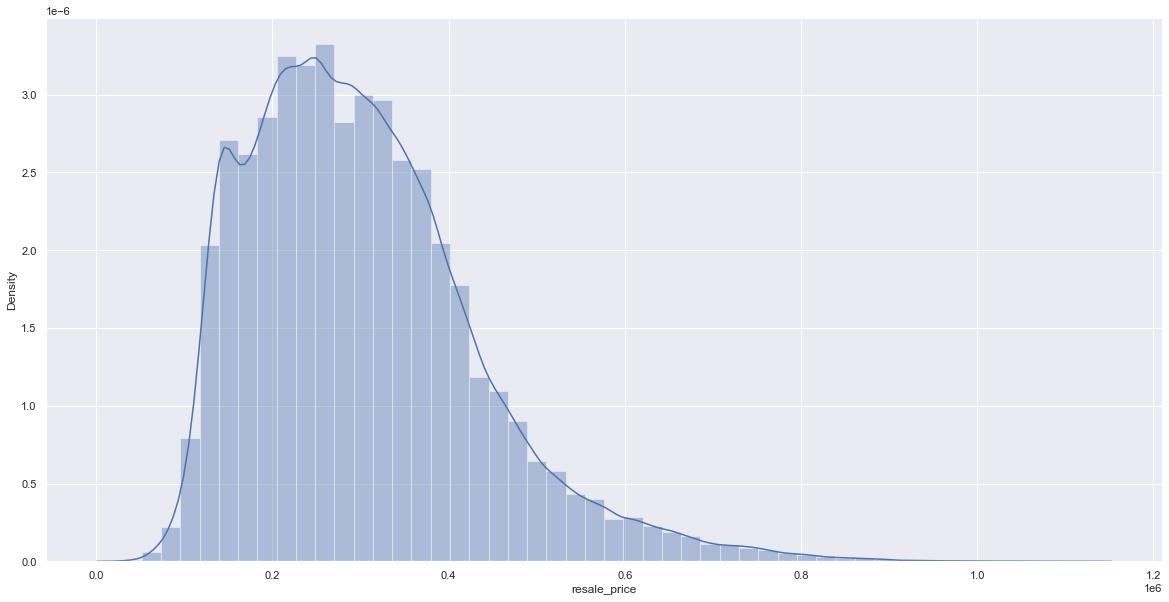

In [69]:
#target variable release_price
sns.distplot(df_train9['resale_price'])

In [70]:
#skewness and kurtosis
print("Skewness: %f" % df_train9['resale_price'].skew())
print("Kurtosis: %f" % df_train9['resale_price'].kurt())

Skewness: 0.989732
Kurtosis: 1.411183


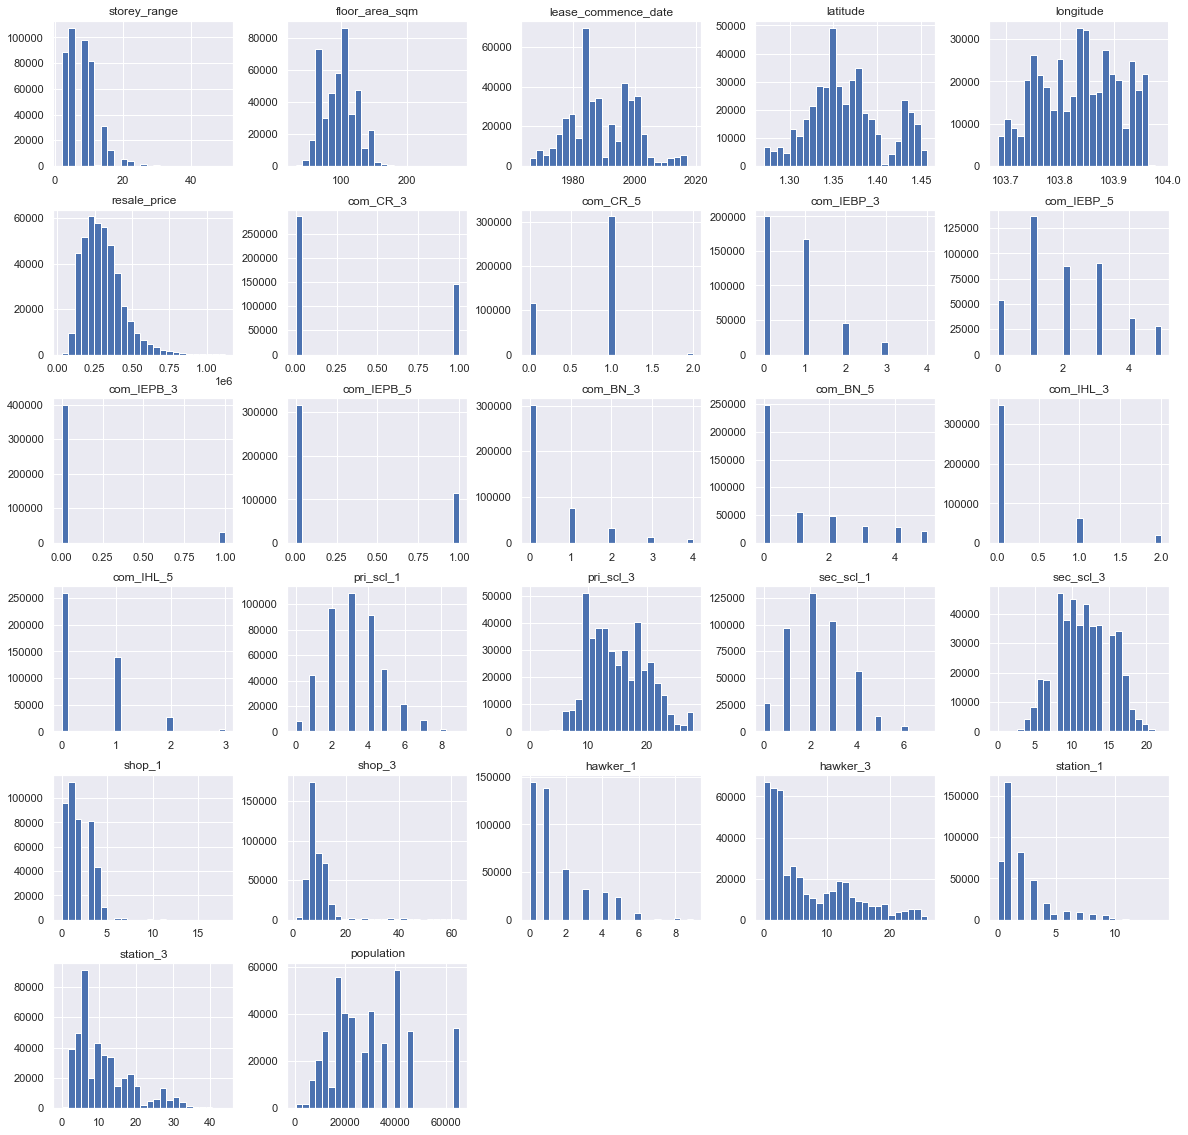

In [71]:
#continuous variables
df_train9.hist(figsize = (20,20),bins=25)
plt.show()

In [72]:
len(df_train9['month'].unique())

251

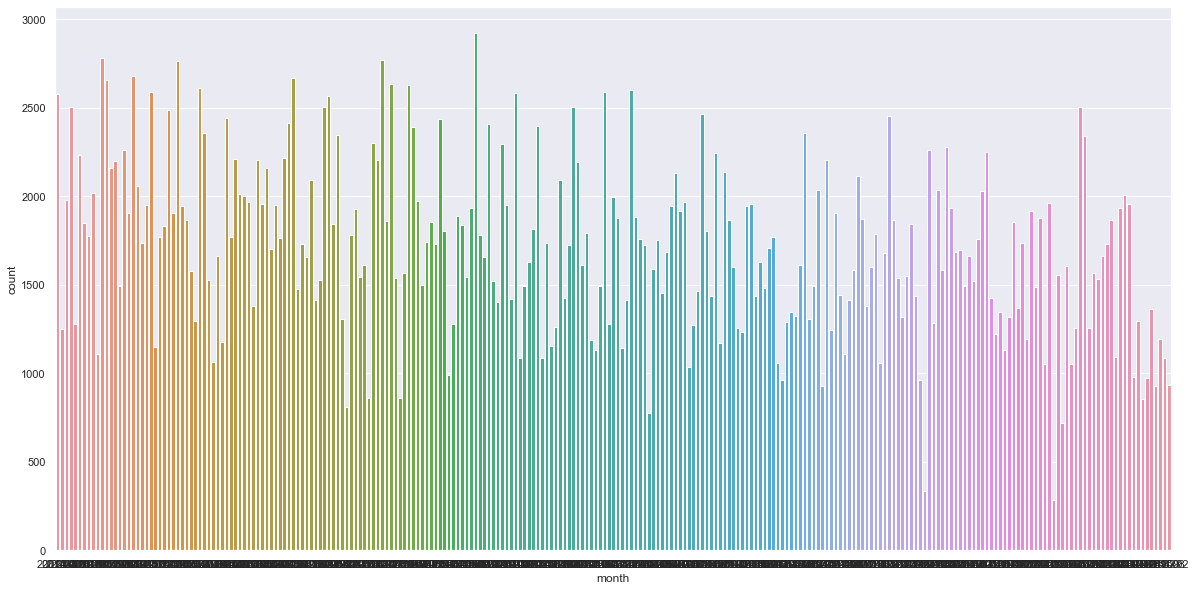

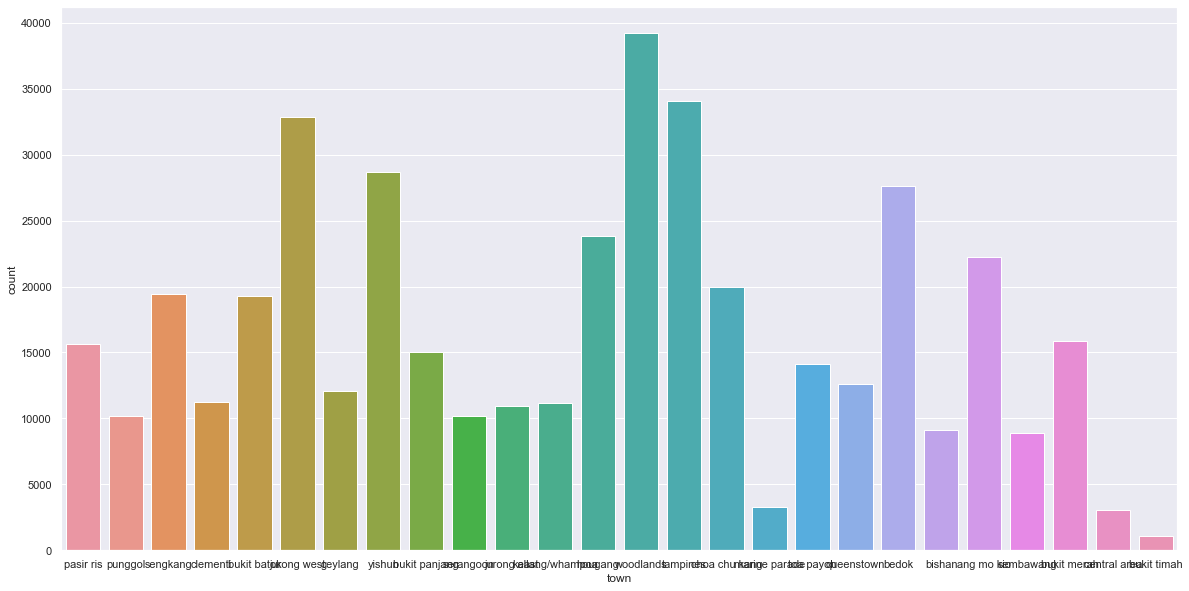

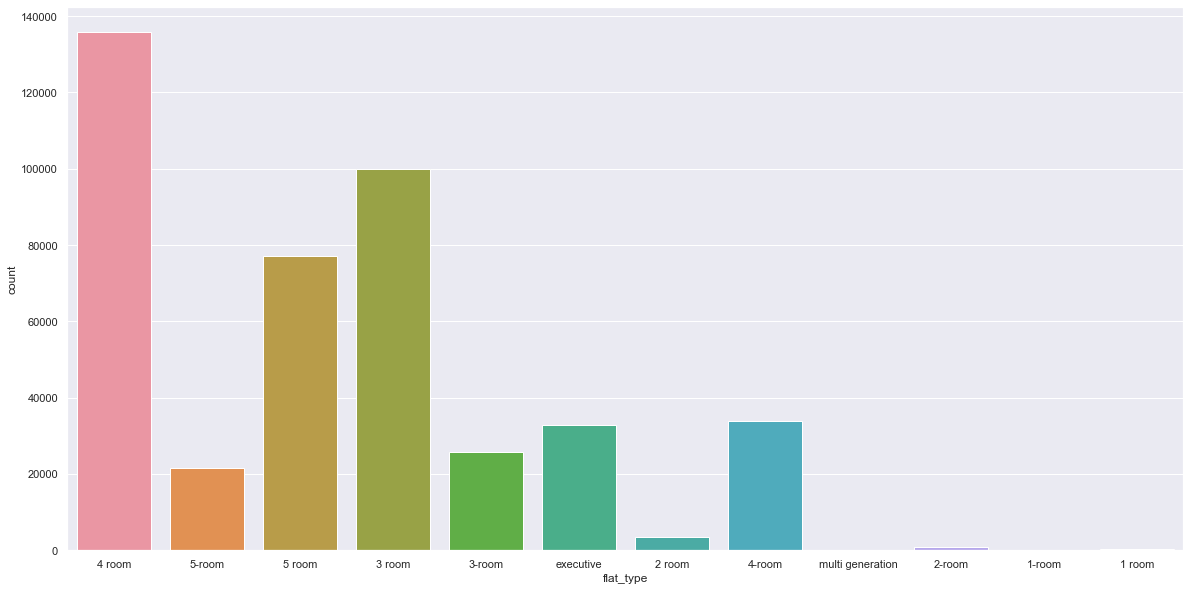

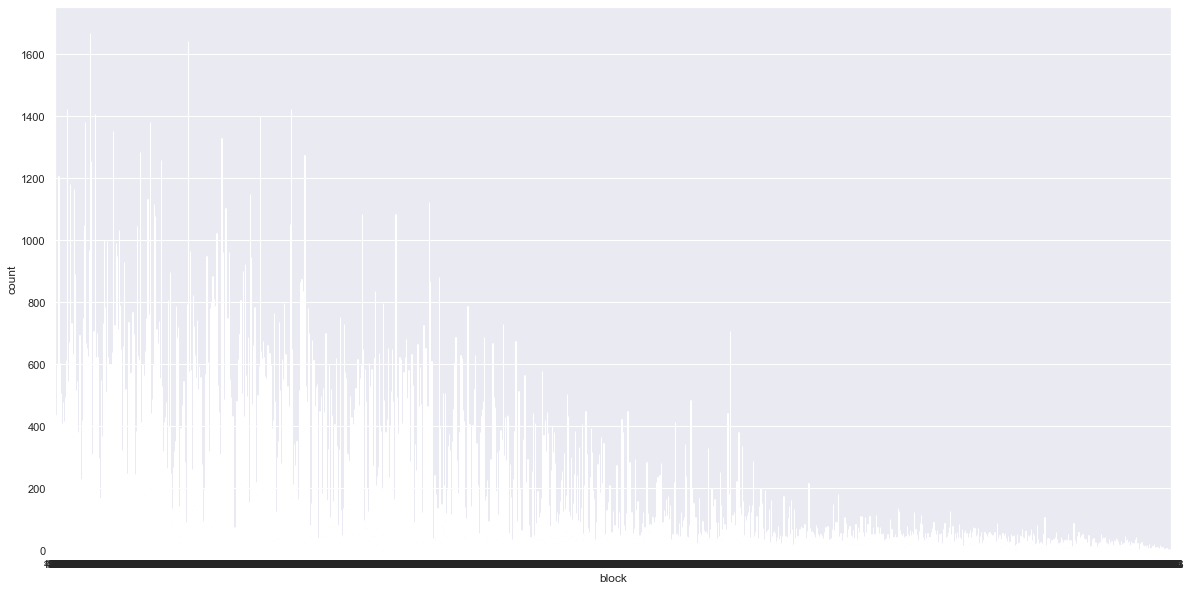

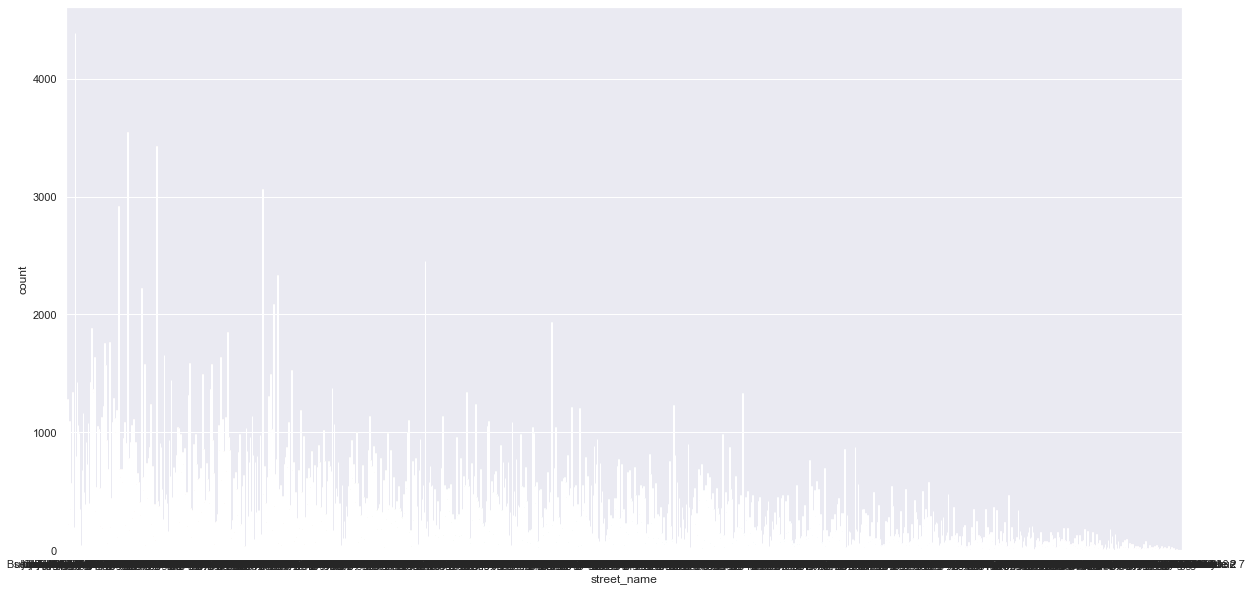

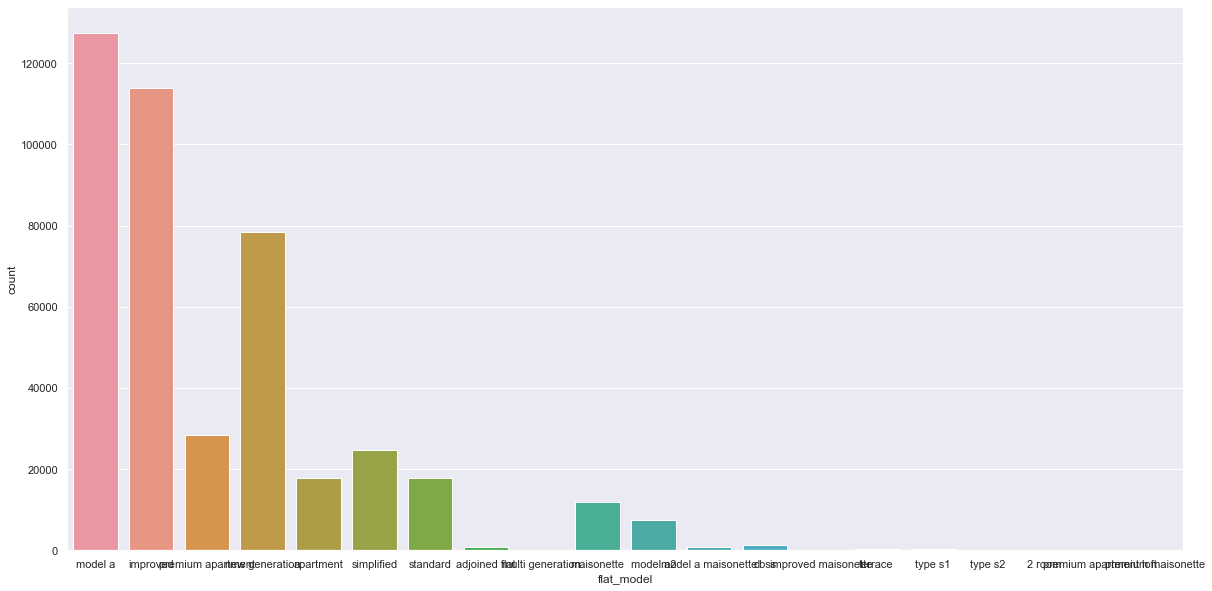

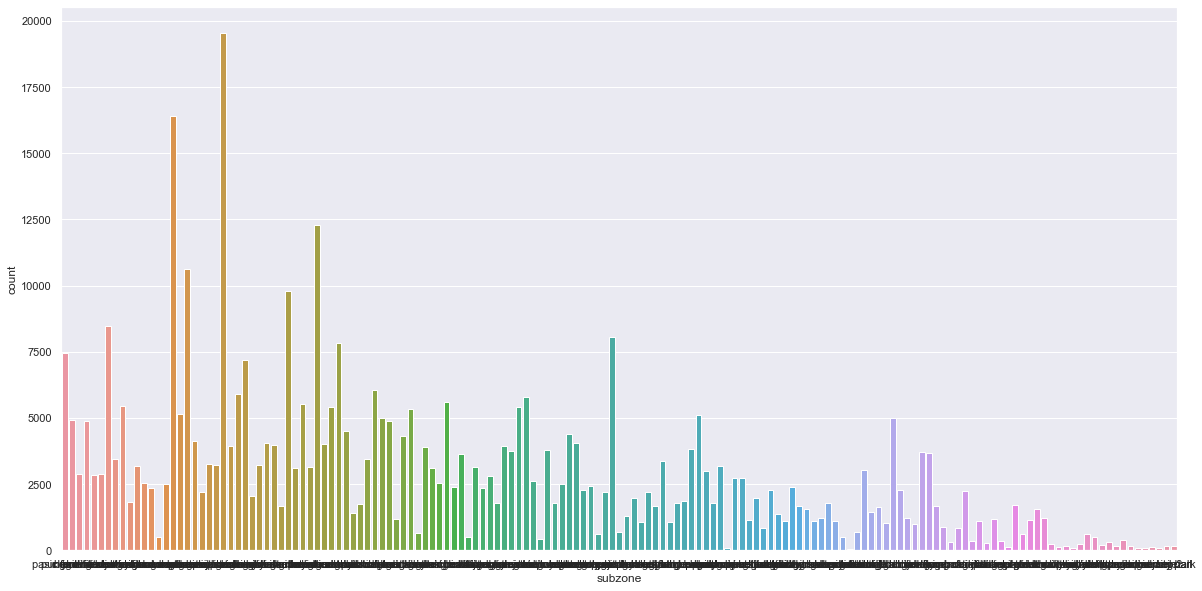

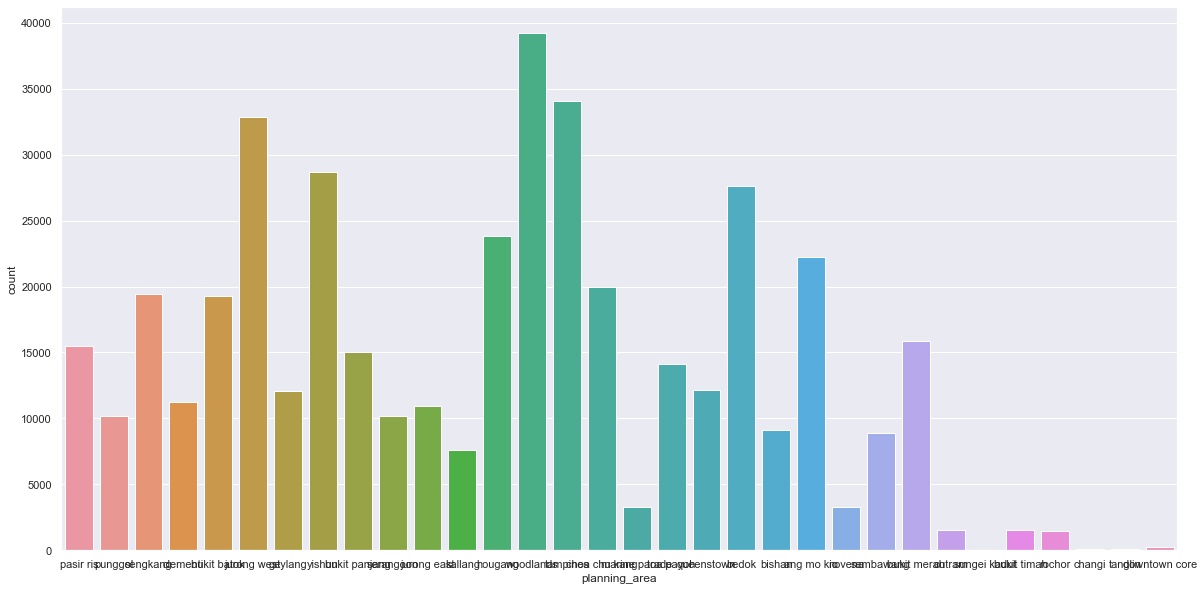

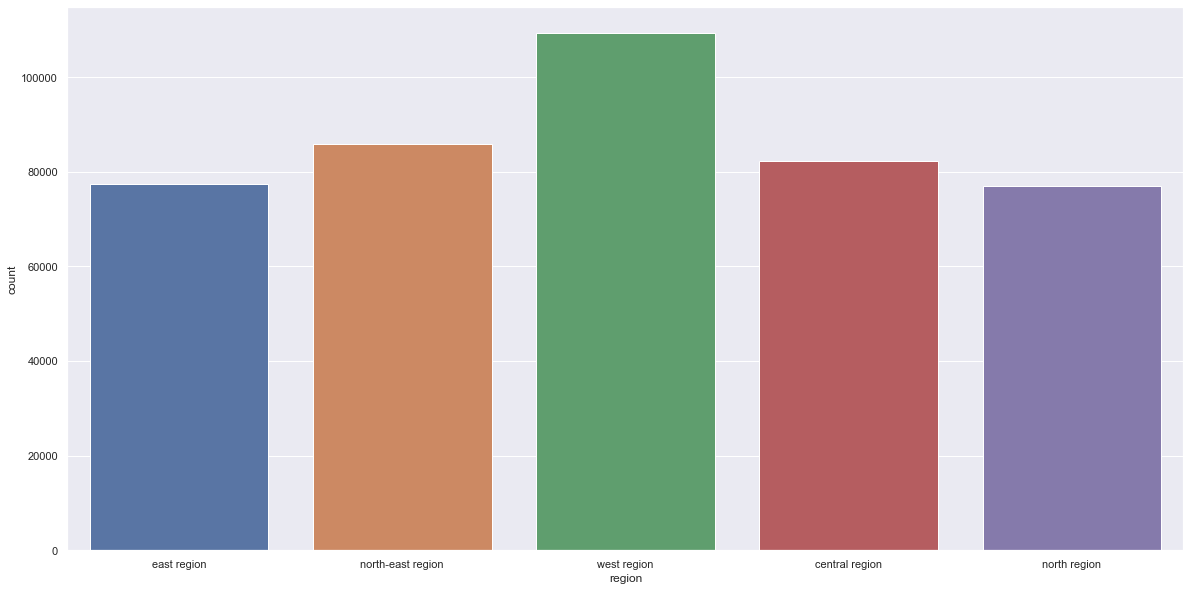

In [73]:
#discrete variables
for i in range(len(discrete_vars)):
    plt.figure(i)
    sns.countplot(x = df_train9[discrete_vars[i]])

In [74]:
df_train9['flat_model'].unique()

array(['model a', 'improved', 'premium apartment', 'new generation',
       'apartment', 'simplified', 'standard', 'adjoined flat',
       'multi generation', 'maisonette', 'model a2', 'model a maisonette',
       'dbss', 'improved maisonette', 'terrace', 'type s1', 'type s2',
       '2 room', 'premium apartment loft', 'premium maisonette'],
      dtype=object)

#  Relationship with Continuous variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


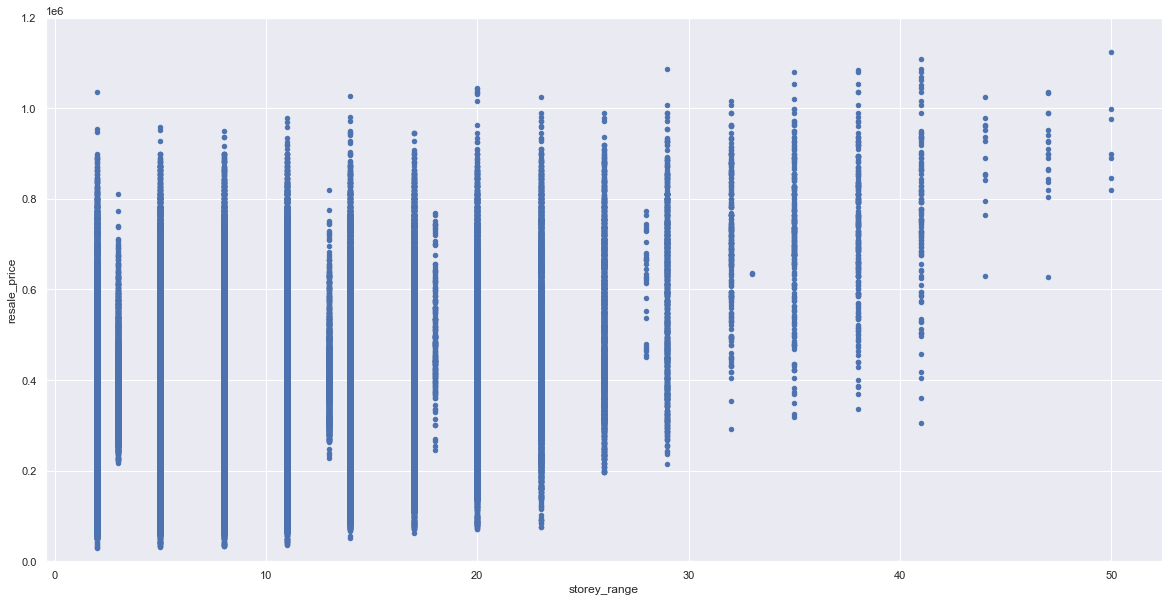

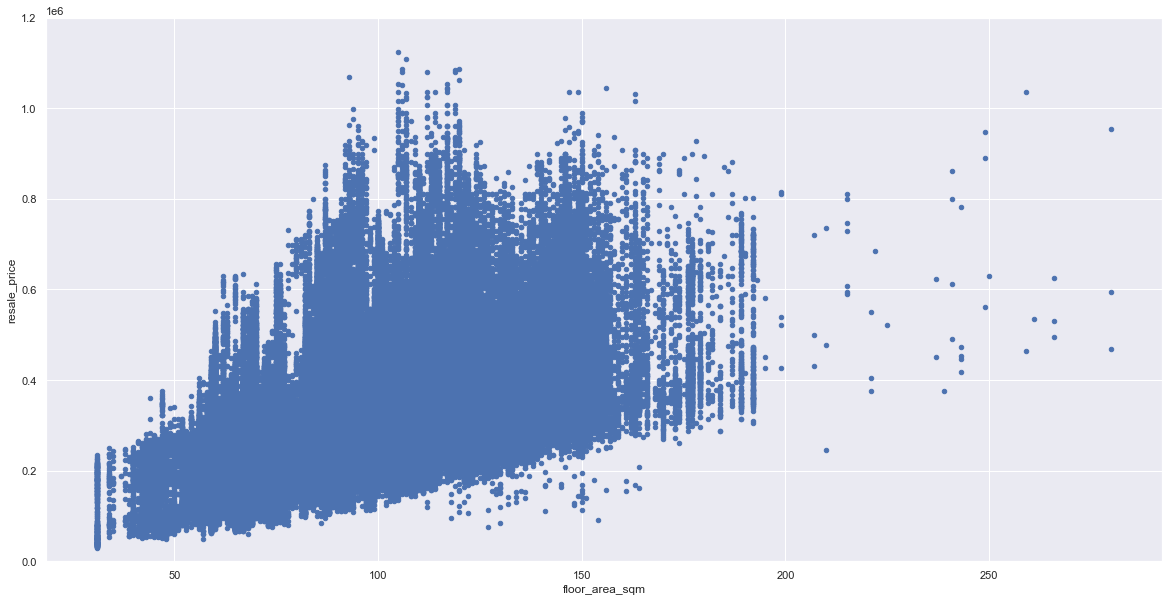

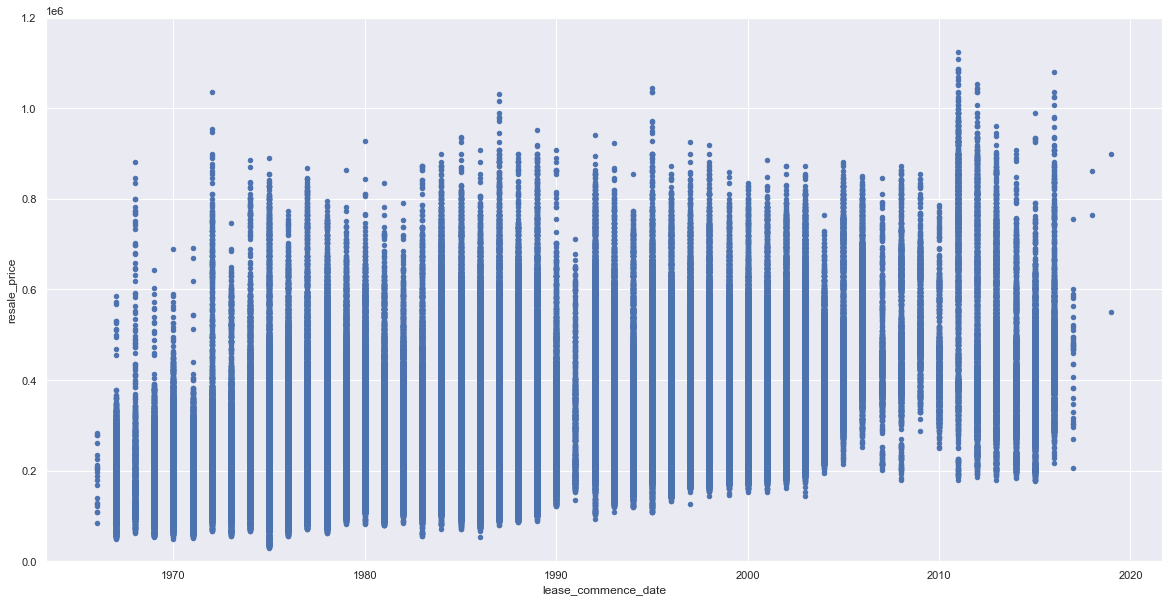

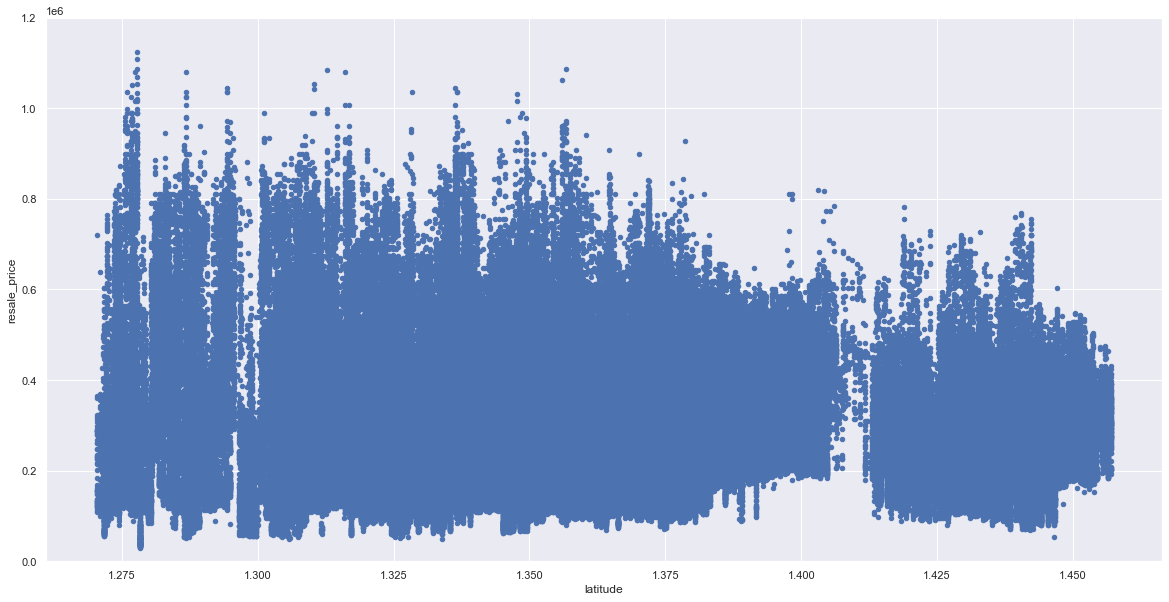

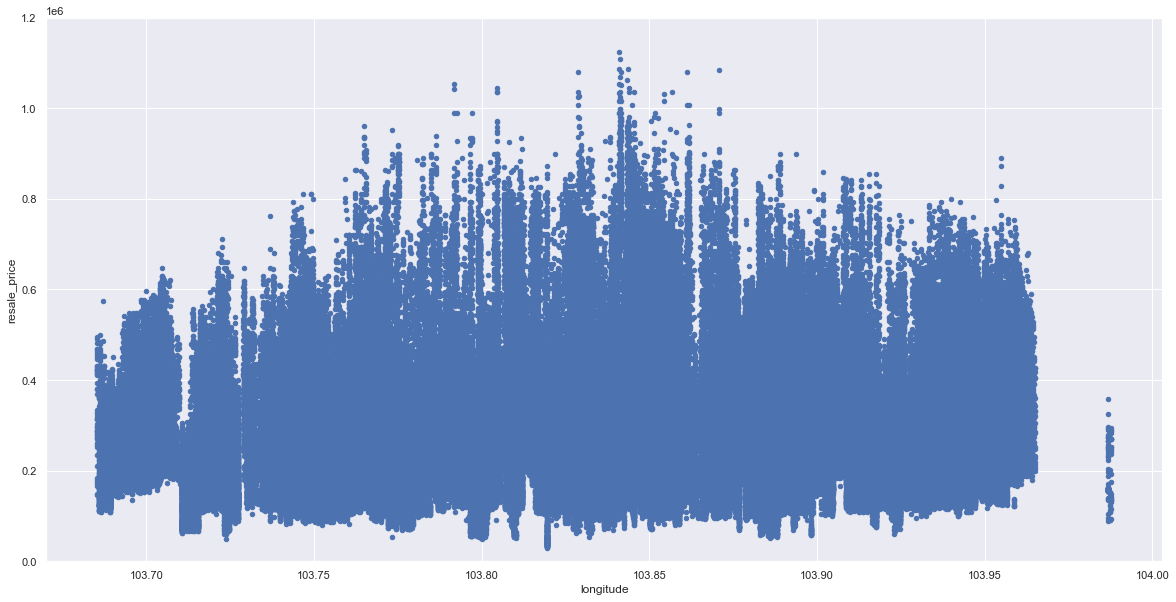

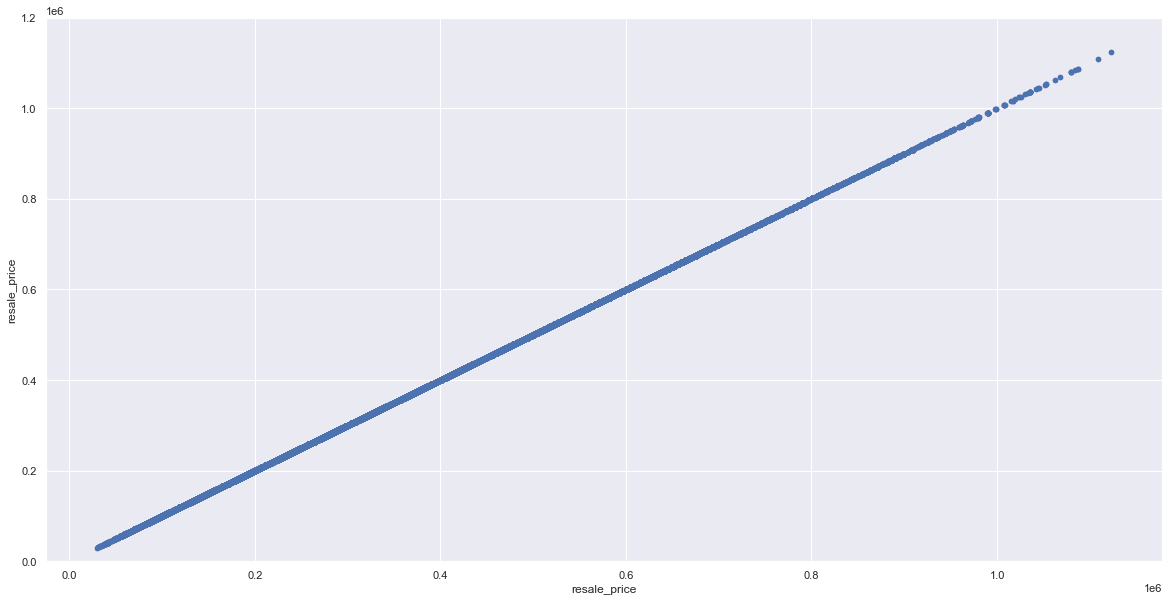

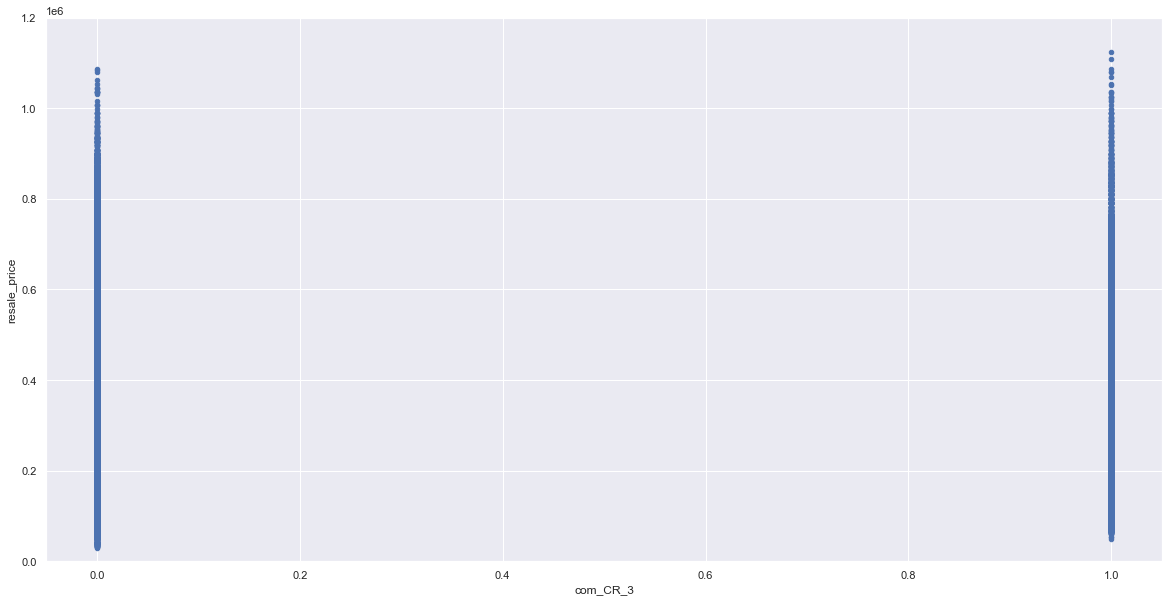

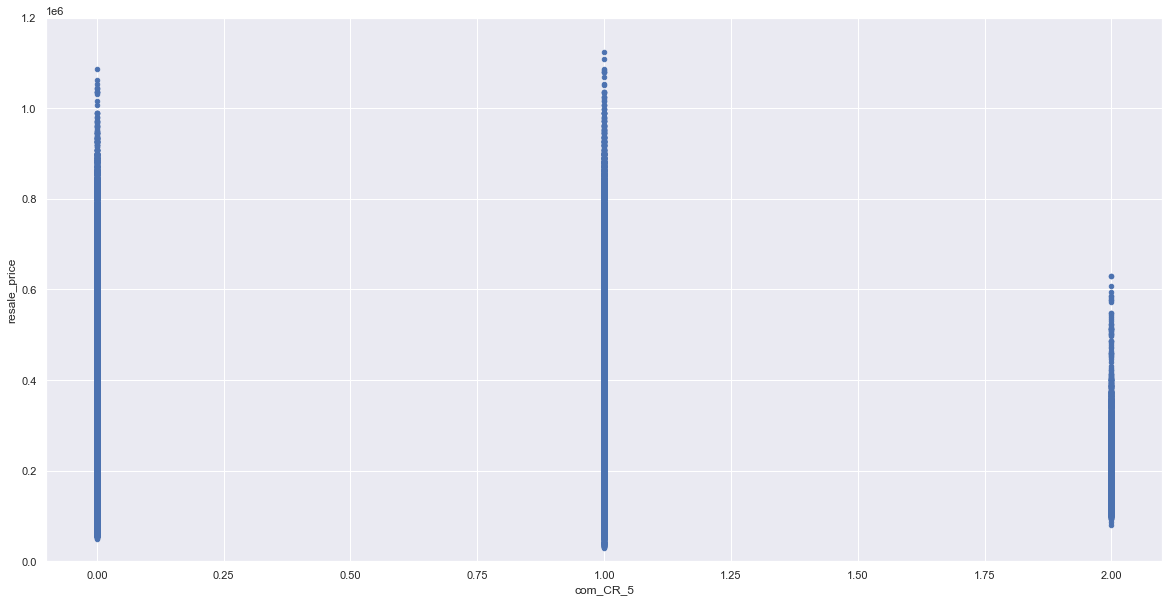

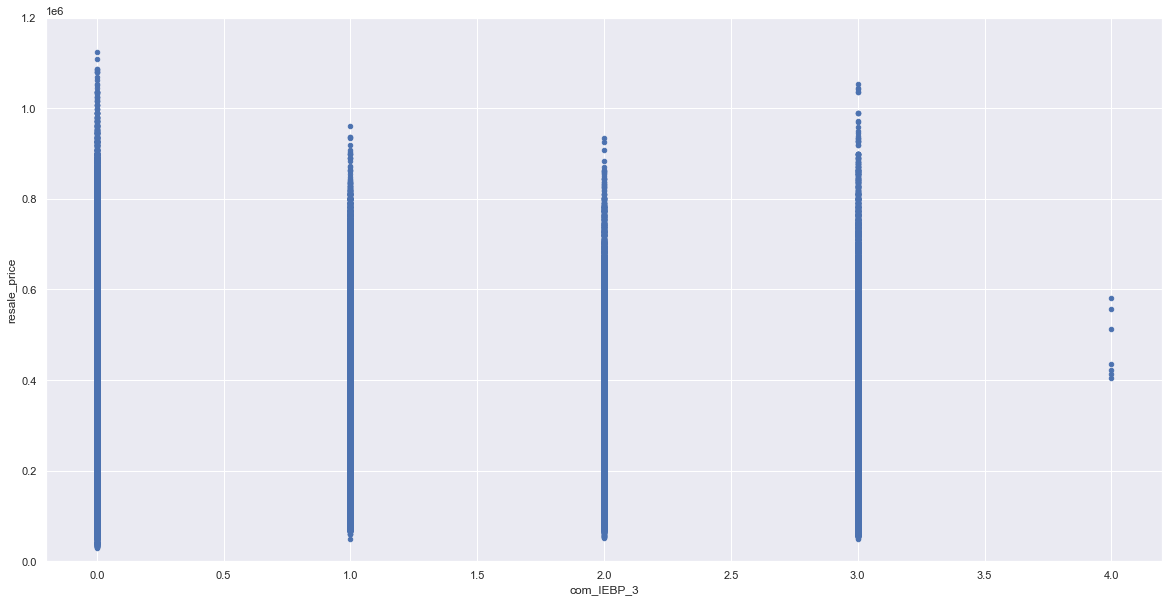

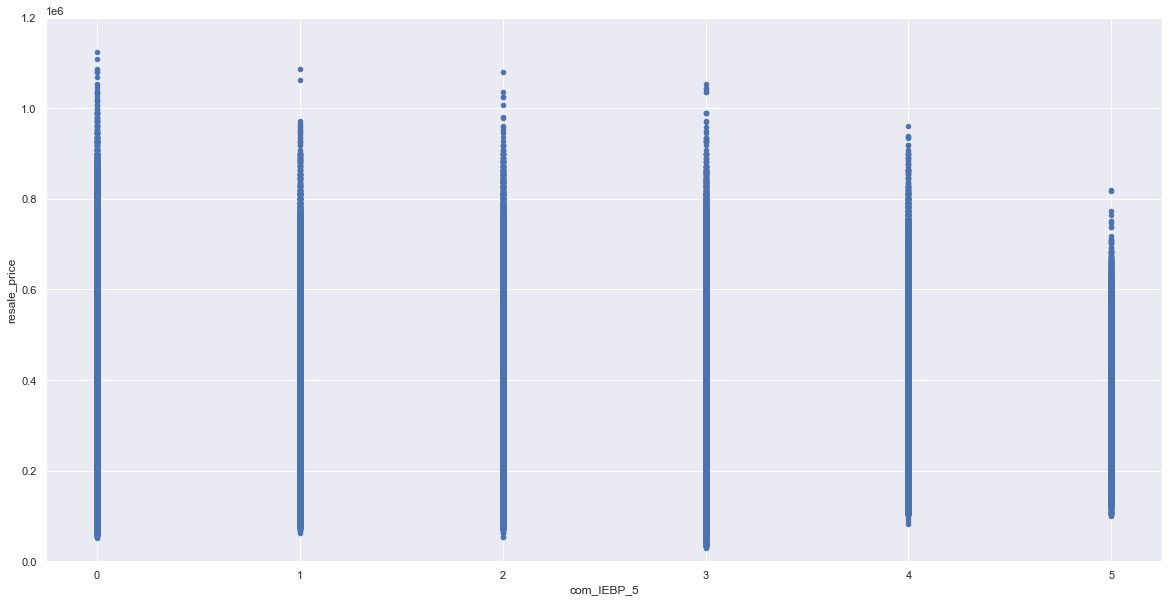

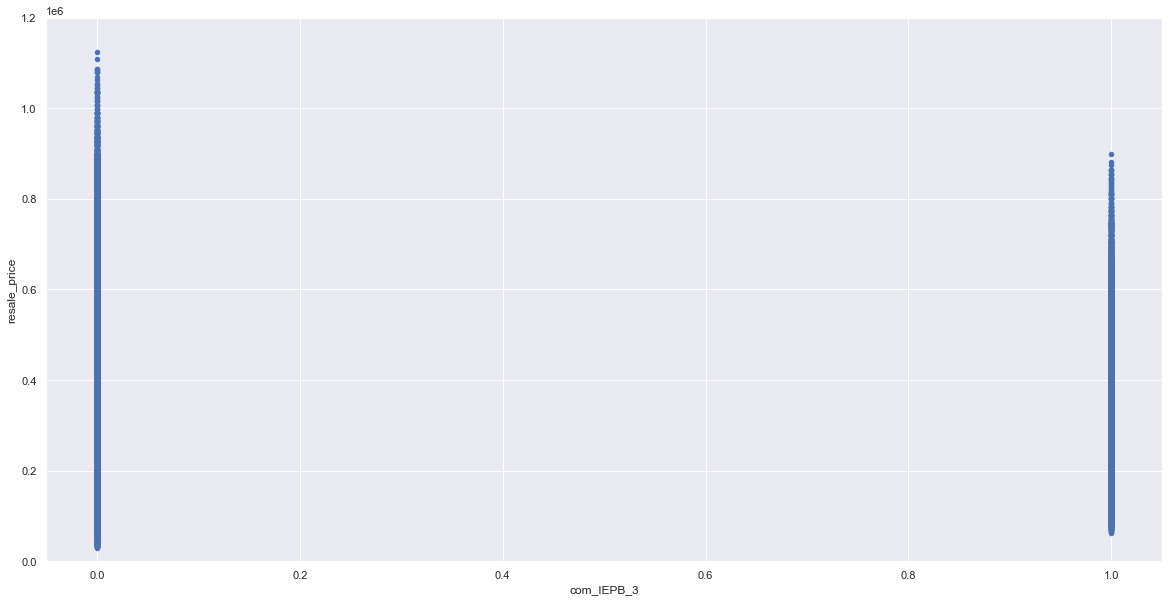

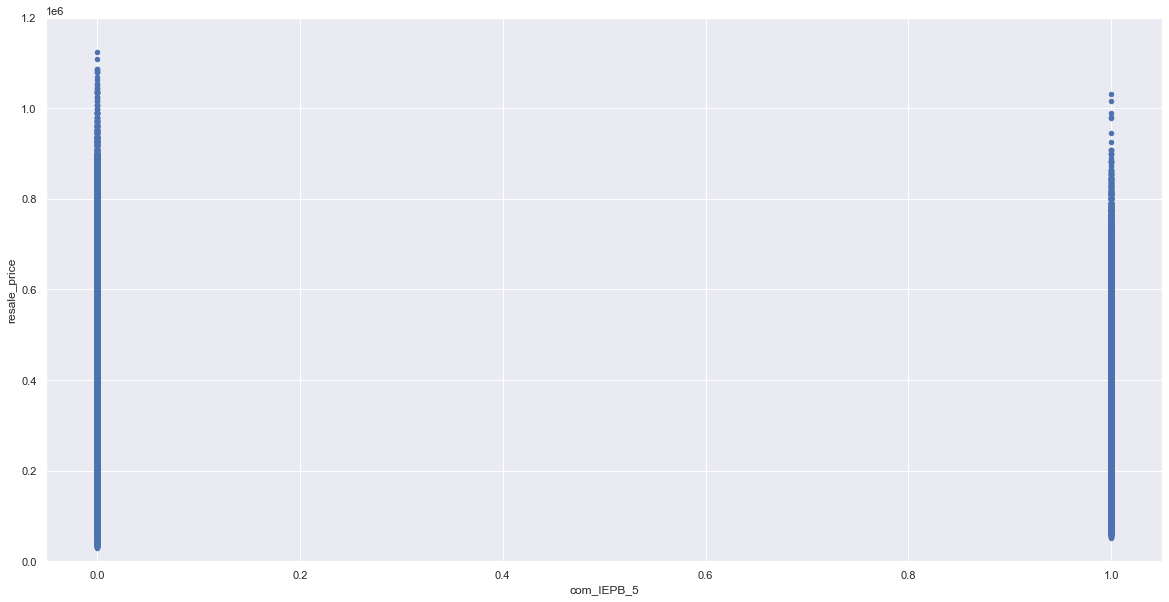

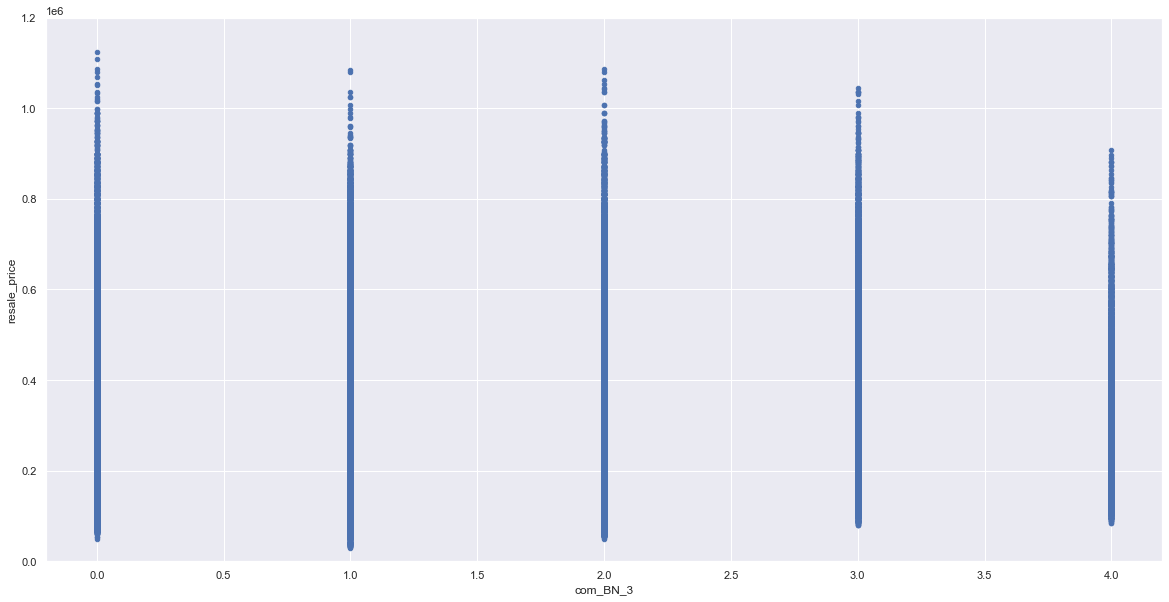

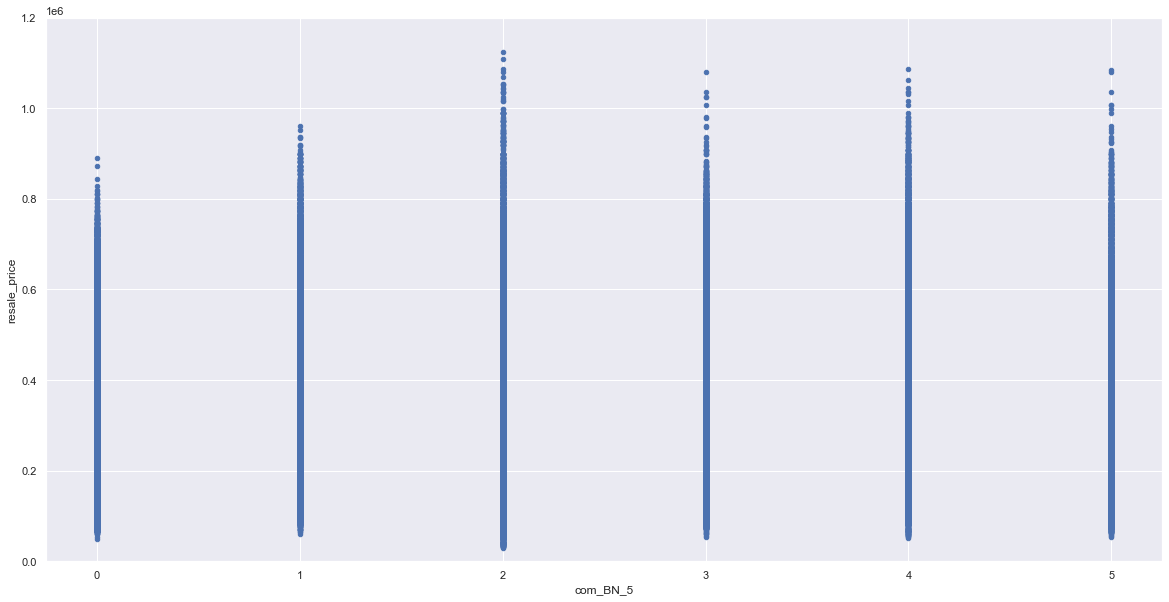

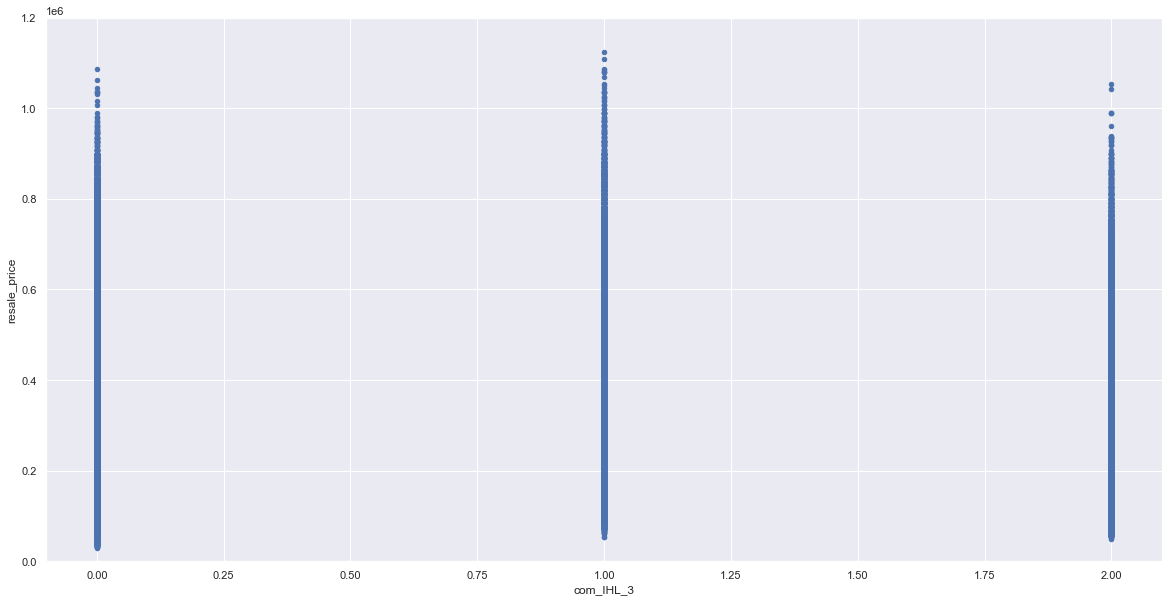

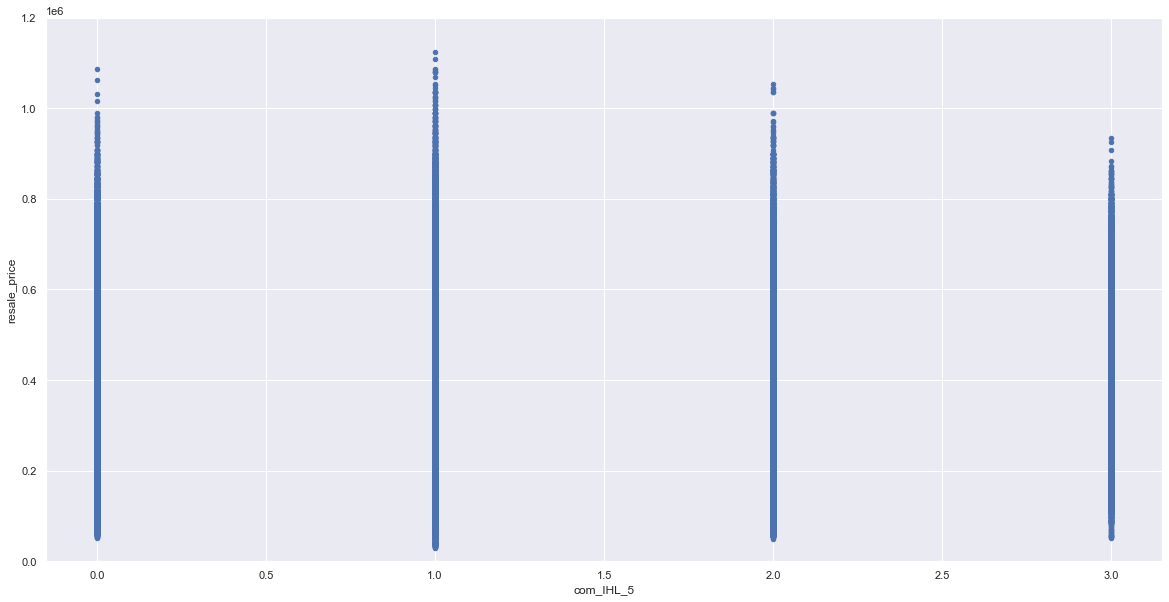

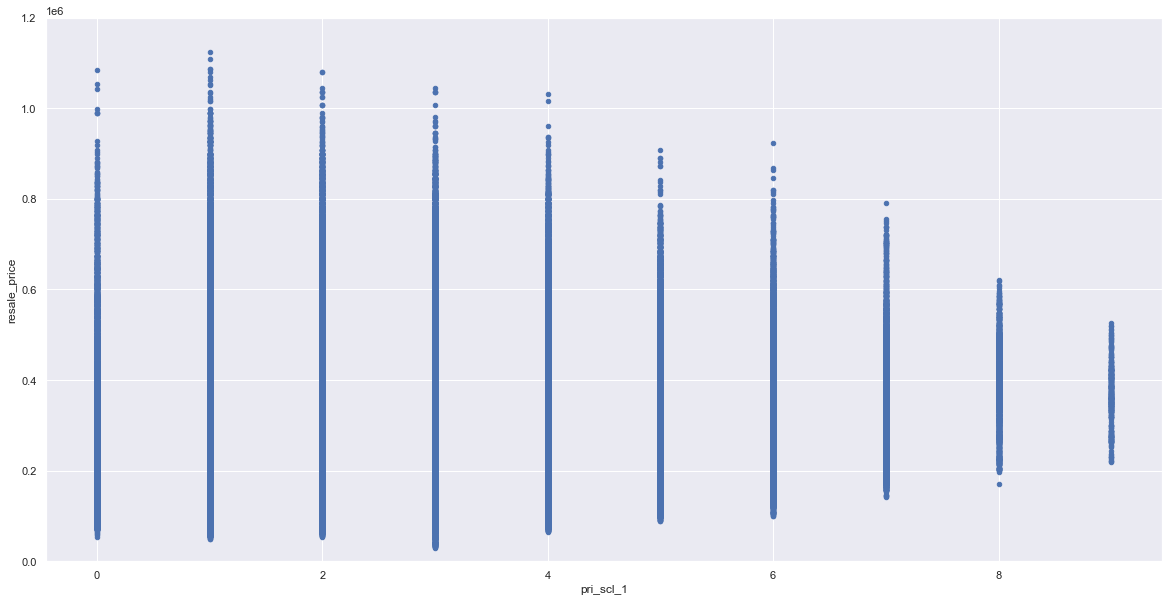

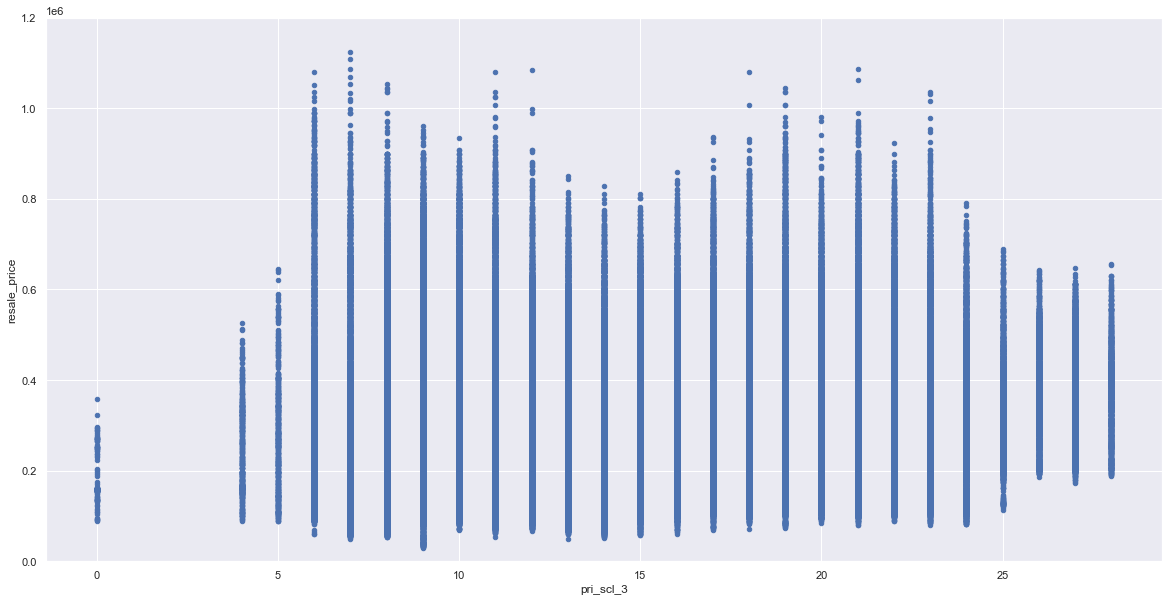

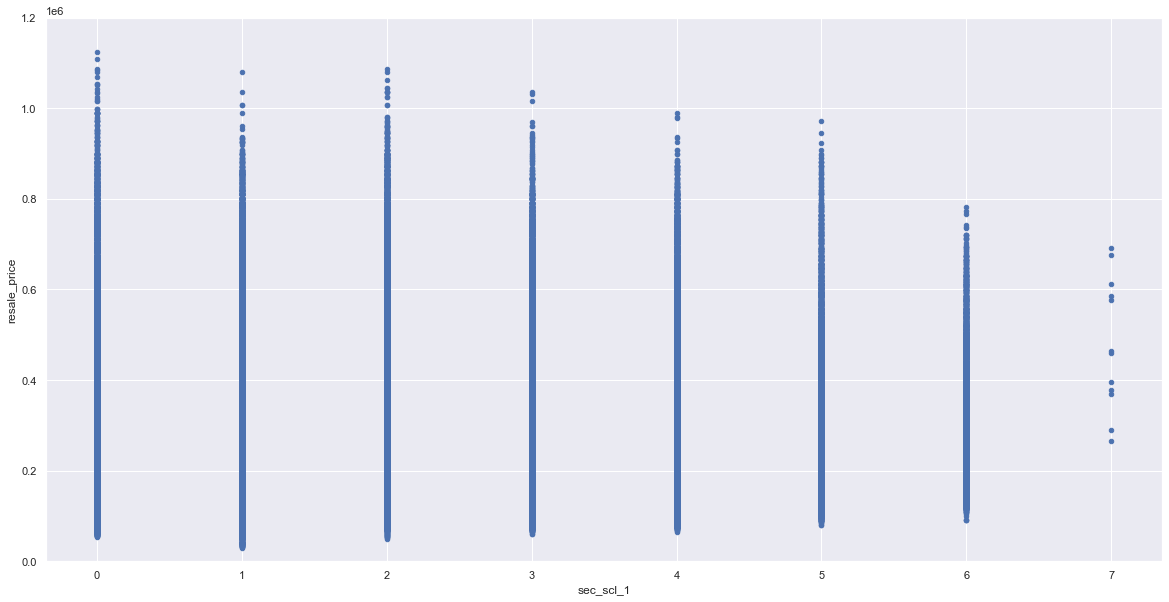

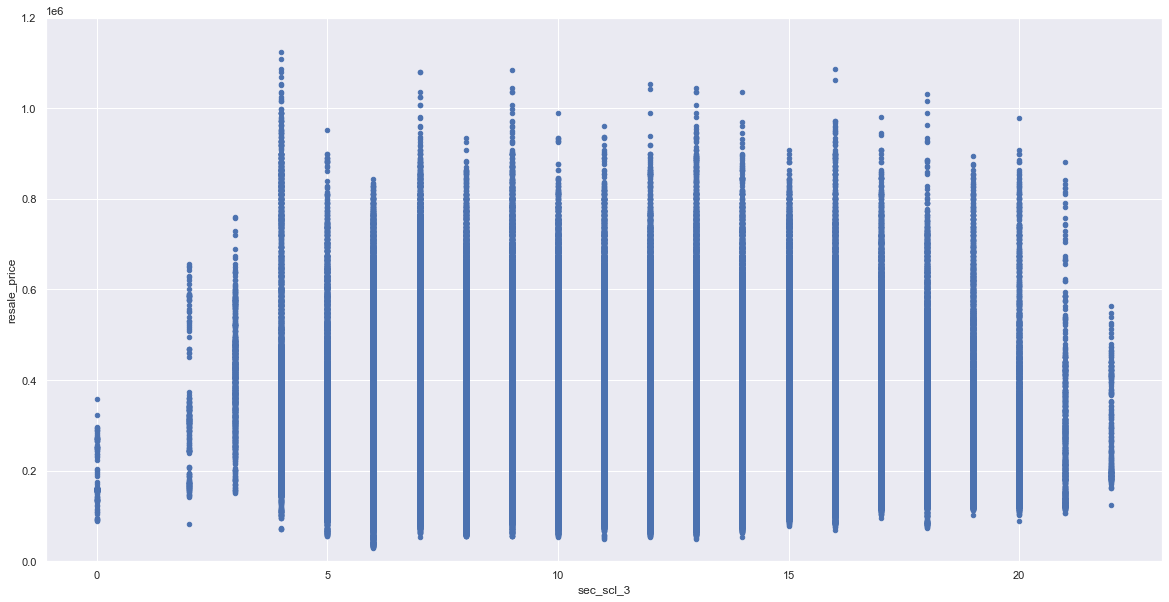

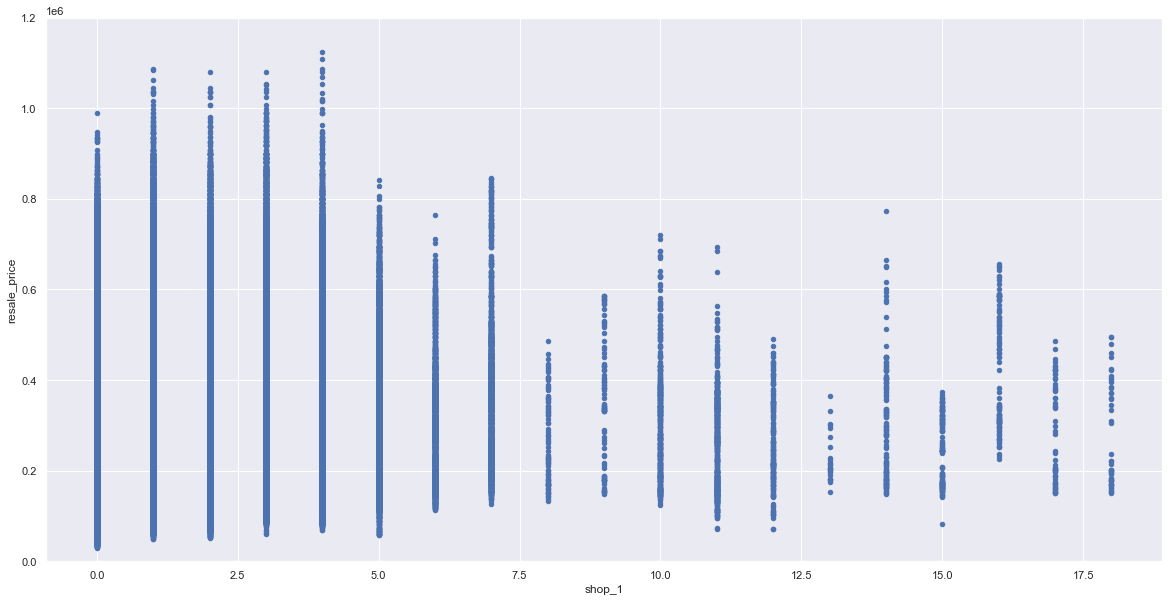

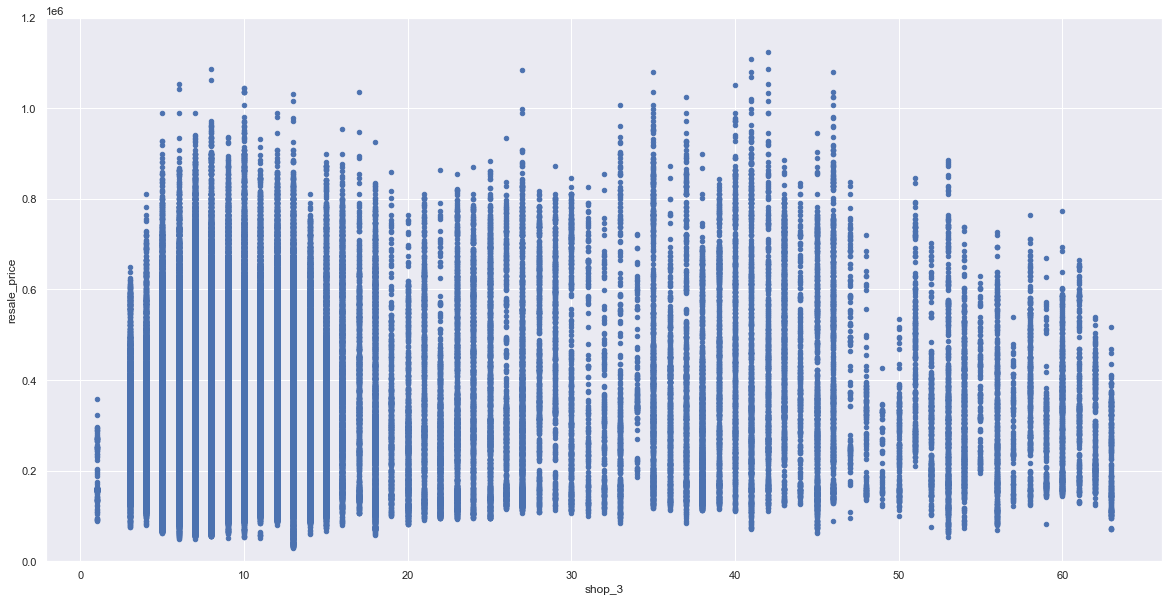

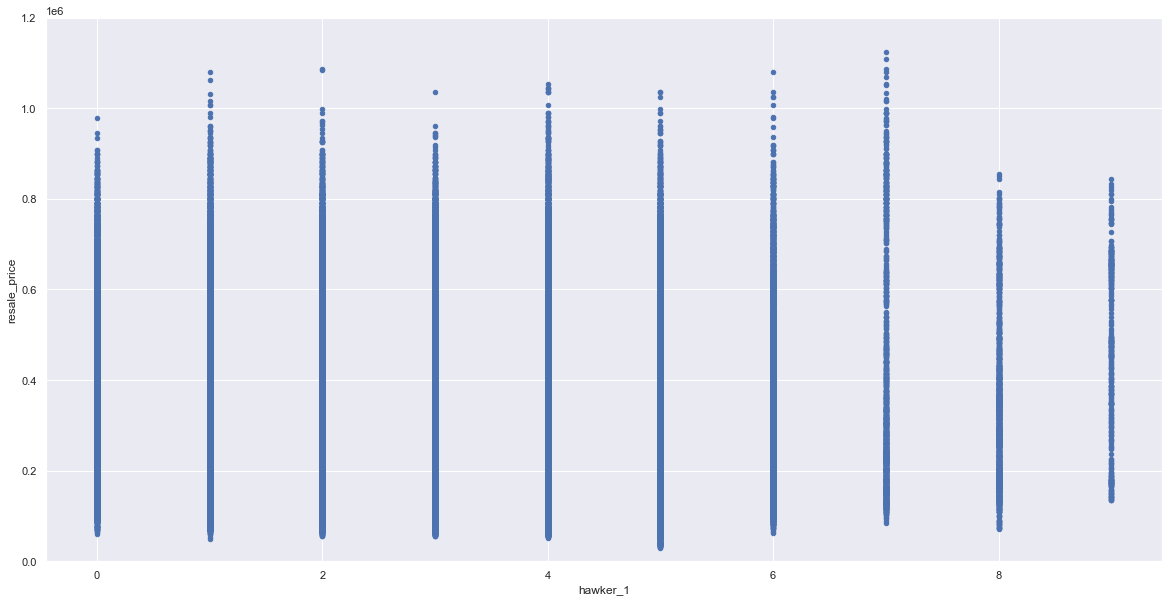

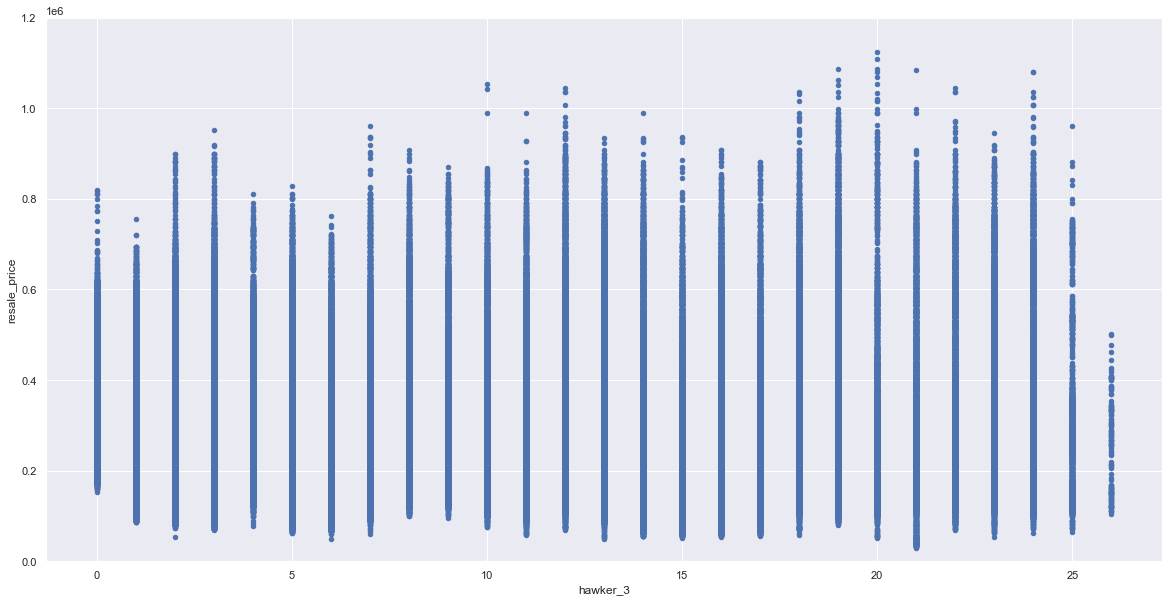

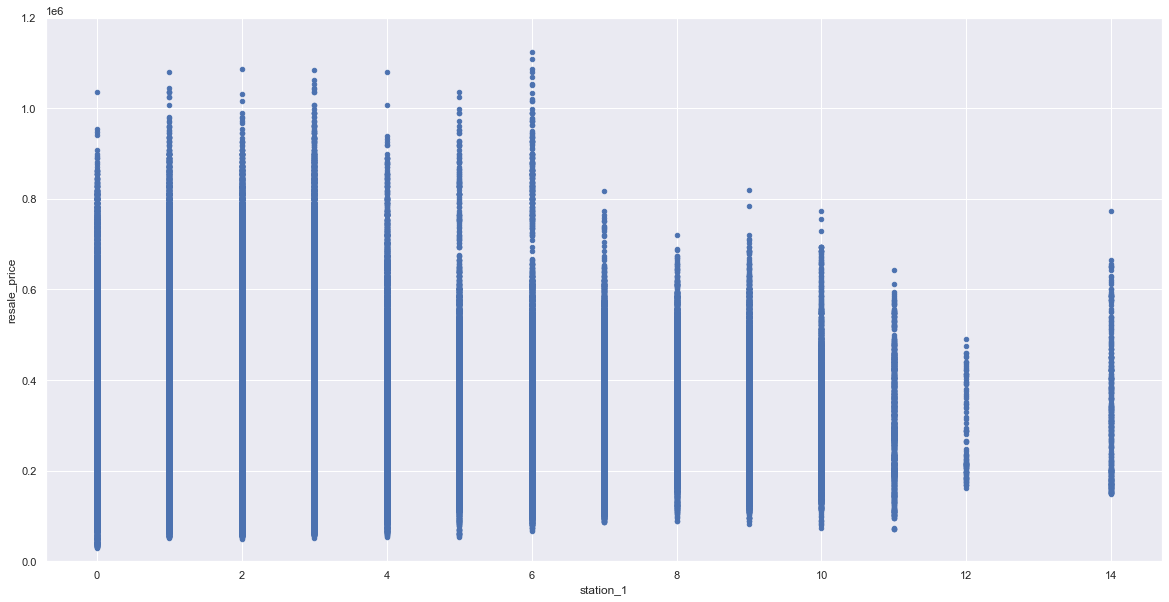

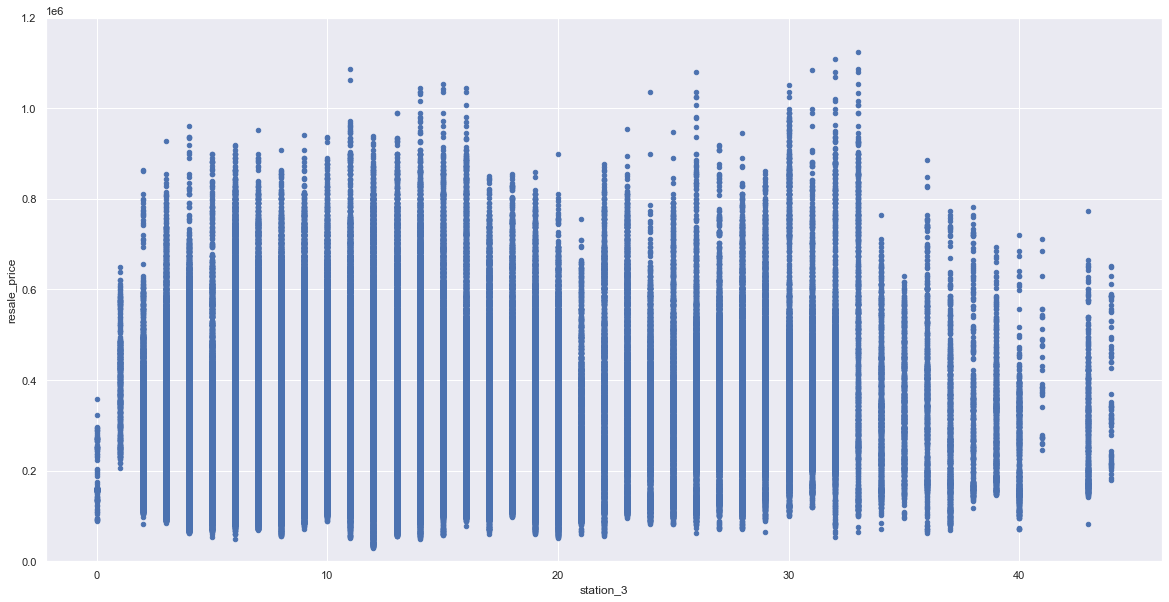

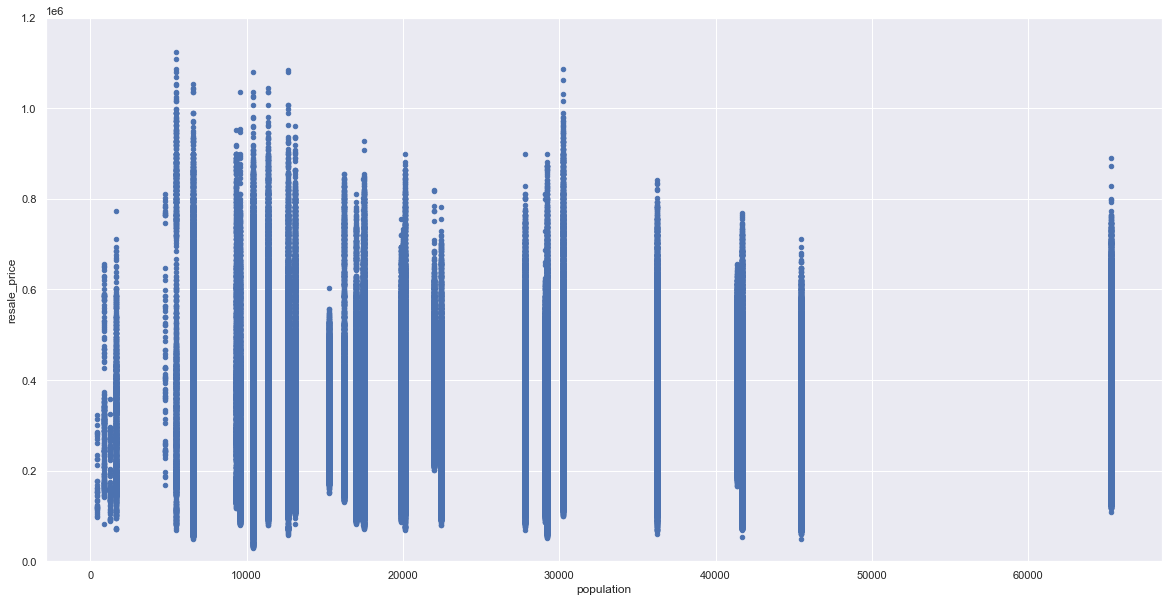

In [75]:
#continuous variables
for i in range(len(continuous_vars)):
    var = continuous_vars[i]
    data = pd.concat([df_train9['resale_price'], df_train9[var]], axis=1)
    data.plot.scatter(x=var, y='resale_price', ylim=(0,1200000));

storey_range, flooer_area_sqm, lease_conmmece_date has a positve correlation with resale_price

# Relationship with Categorical variables

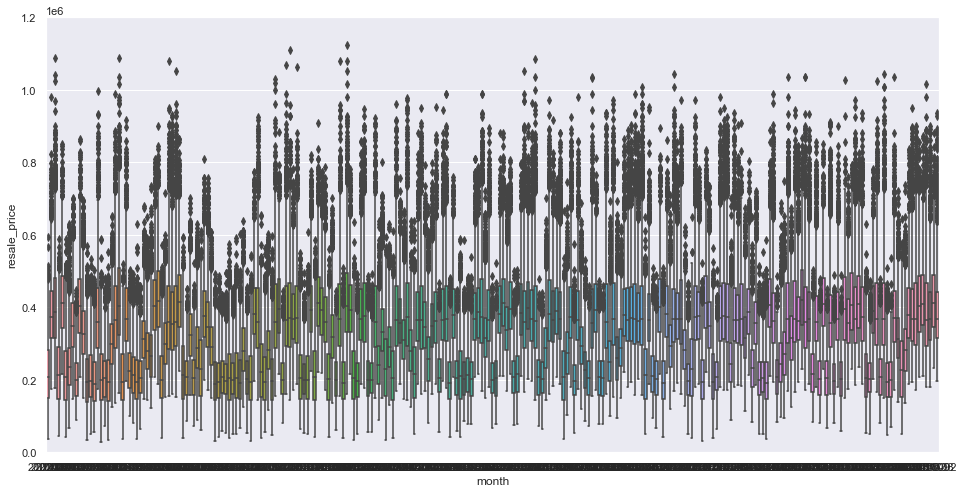

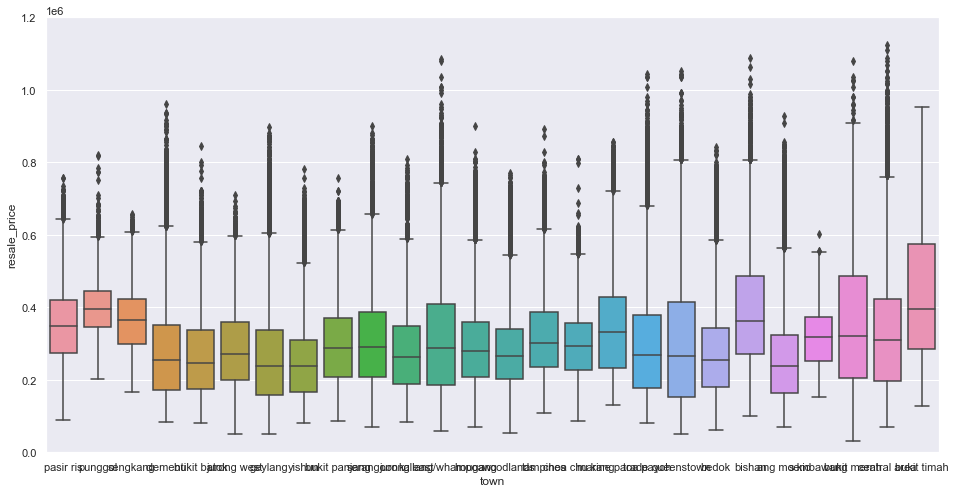

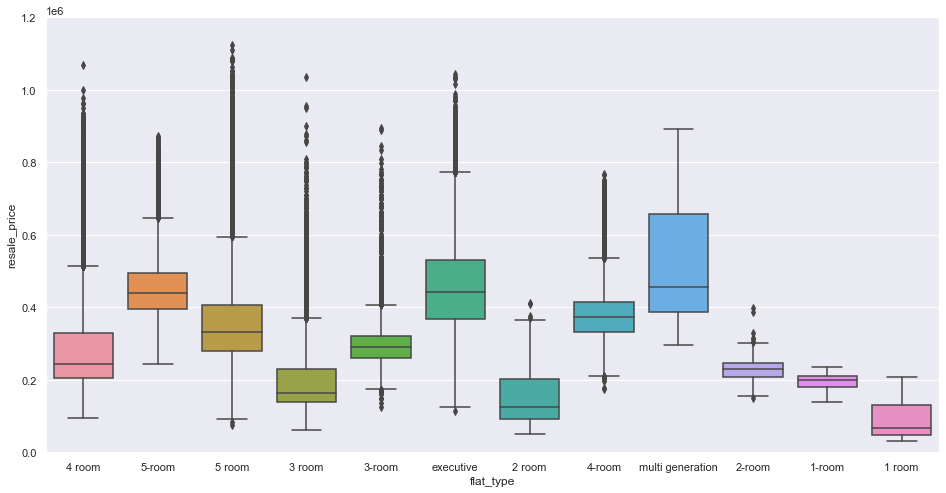

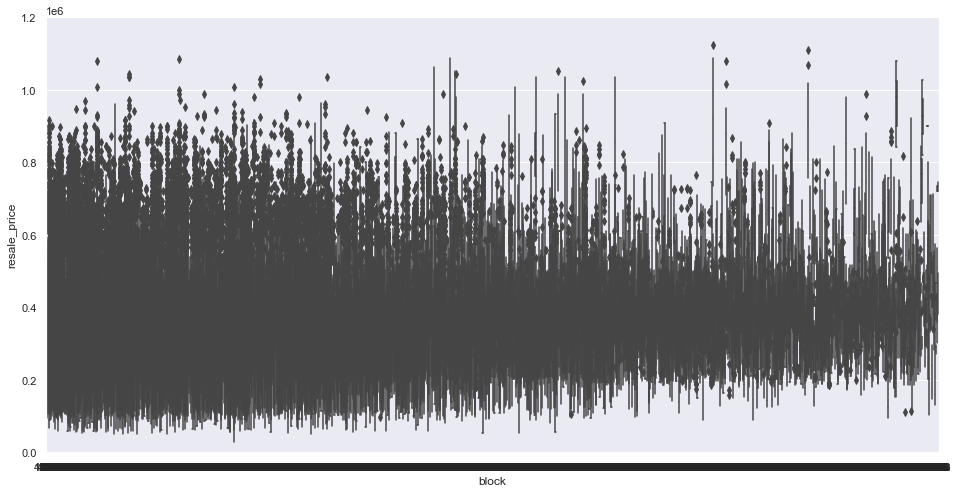

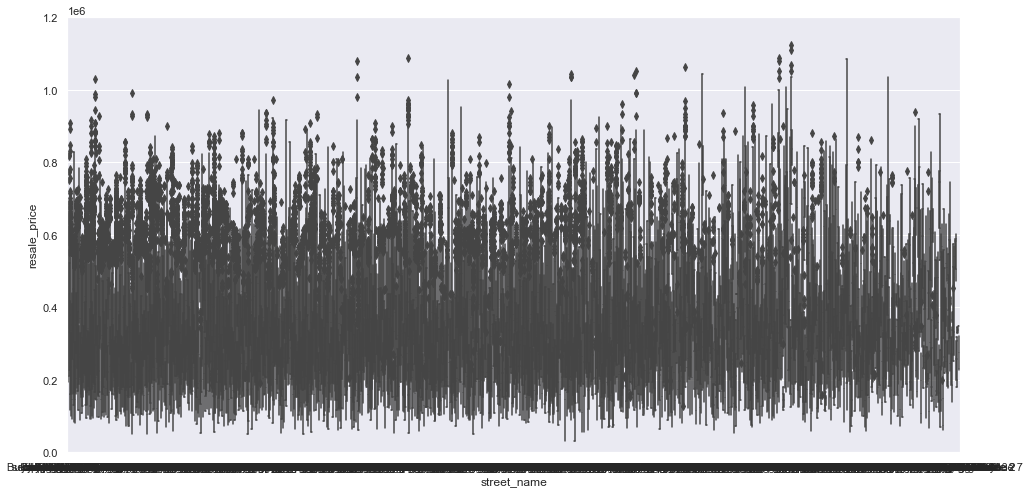

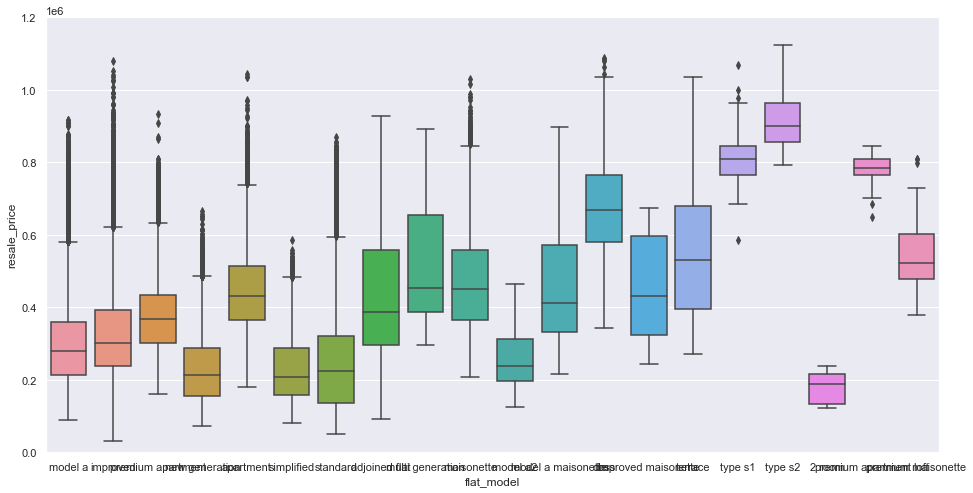

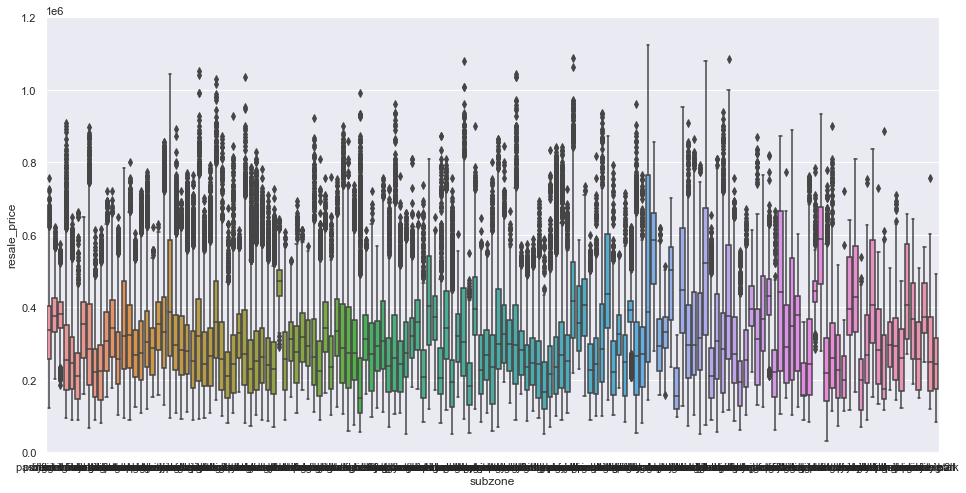

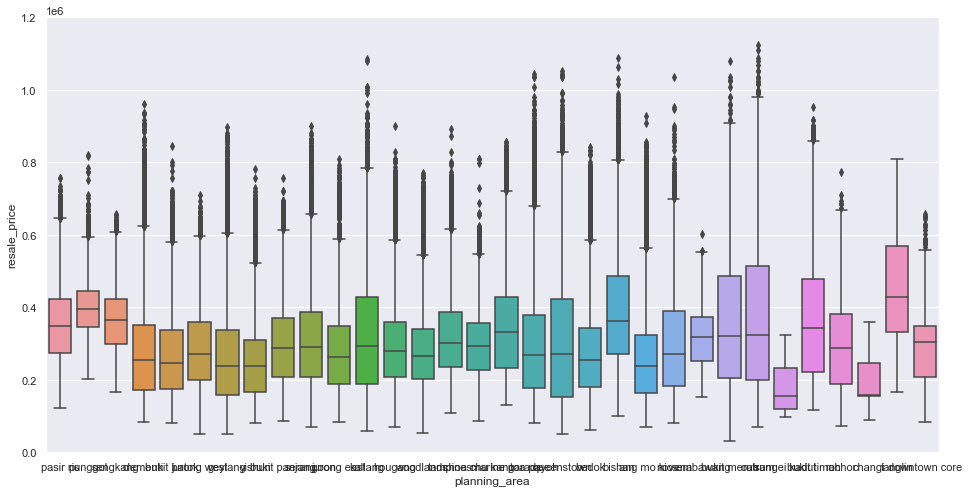

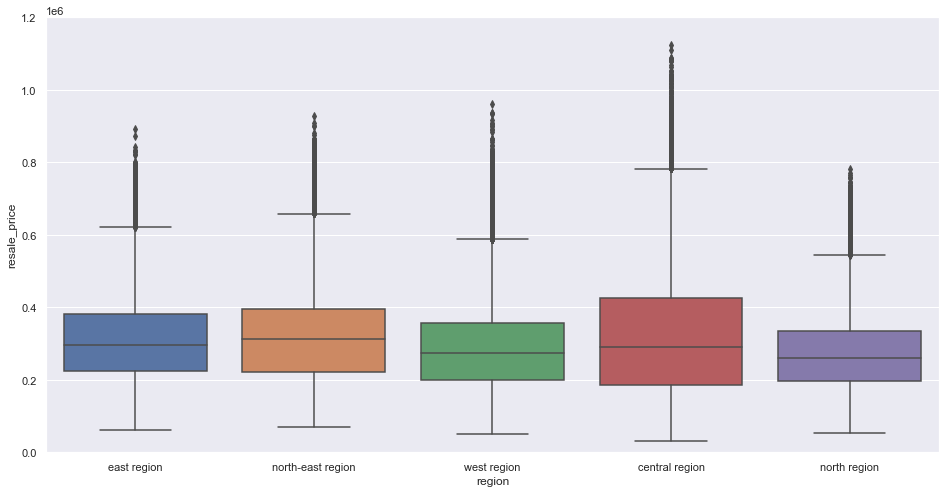

In [76]:
for i in range(len(discrete_vars)):
    var = discrete_vars[i]
    data = pd.concat([df_train9['resale_price'], df_train9[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y='resale_price', data=data)
    fig.axis(ymin=0, ymax=1200000);

# Correlation between features

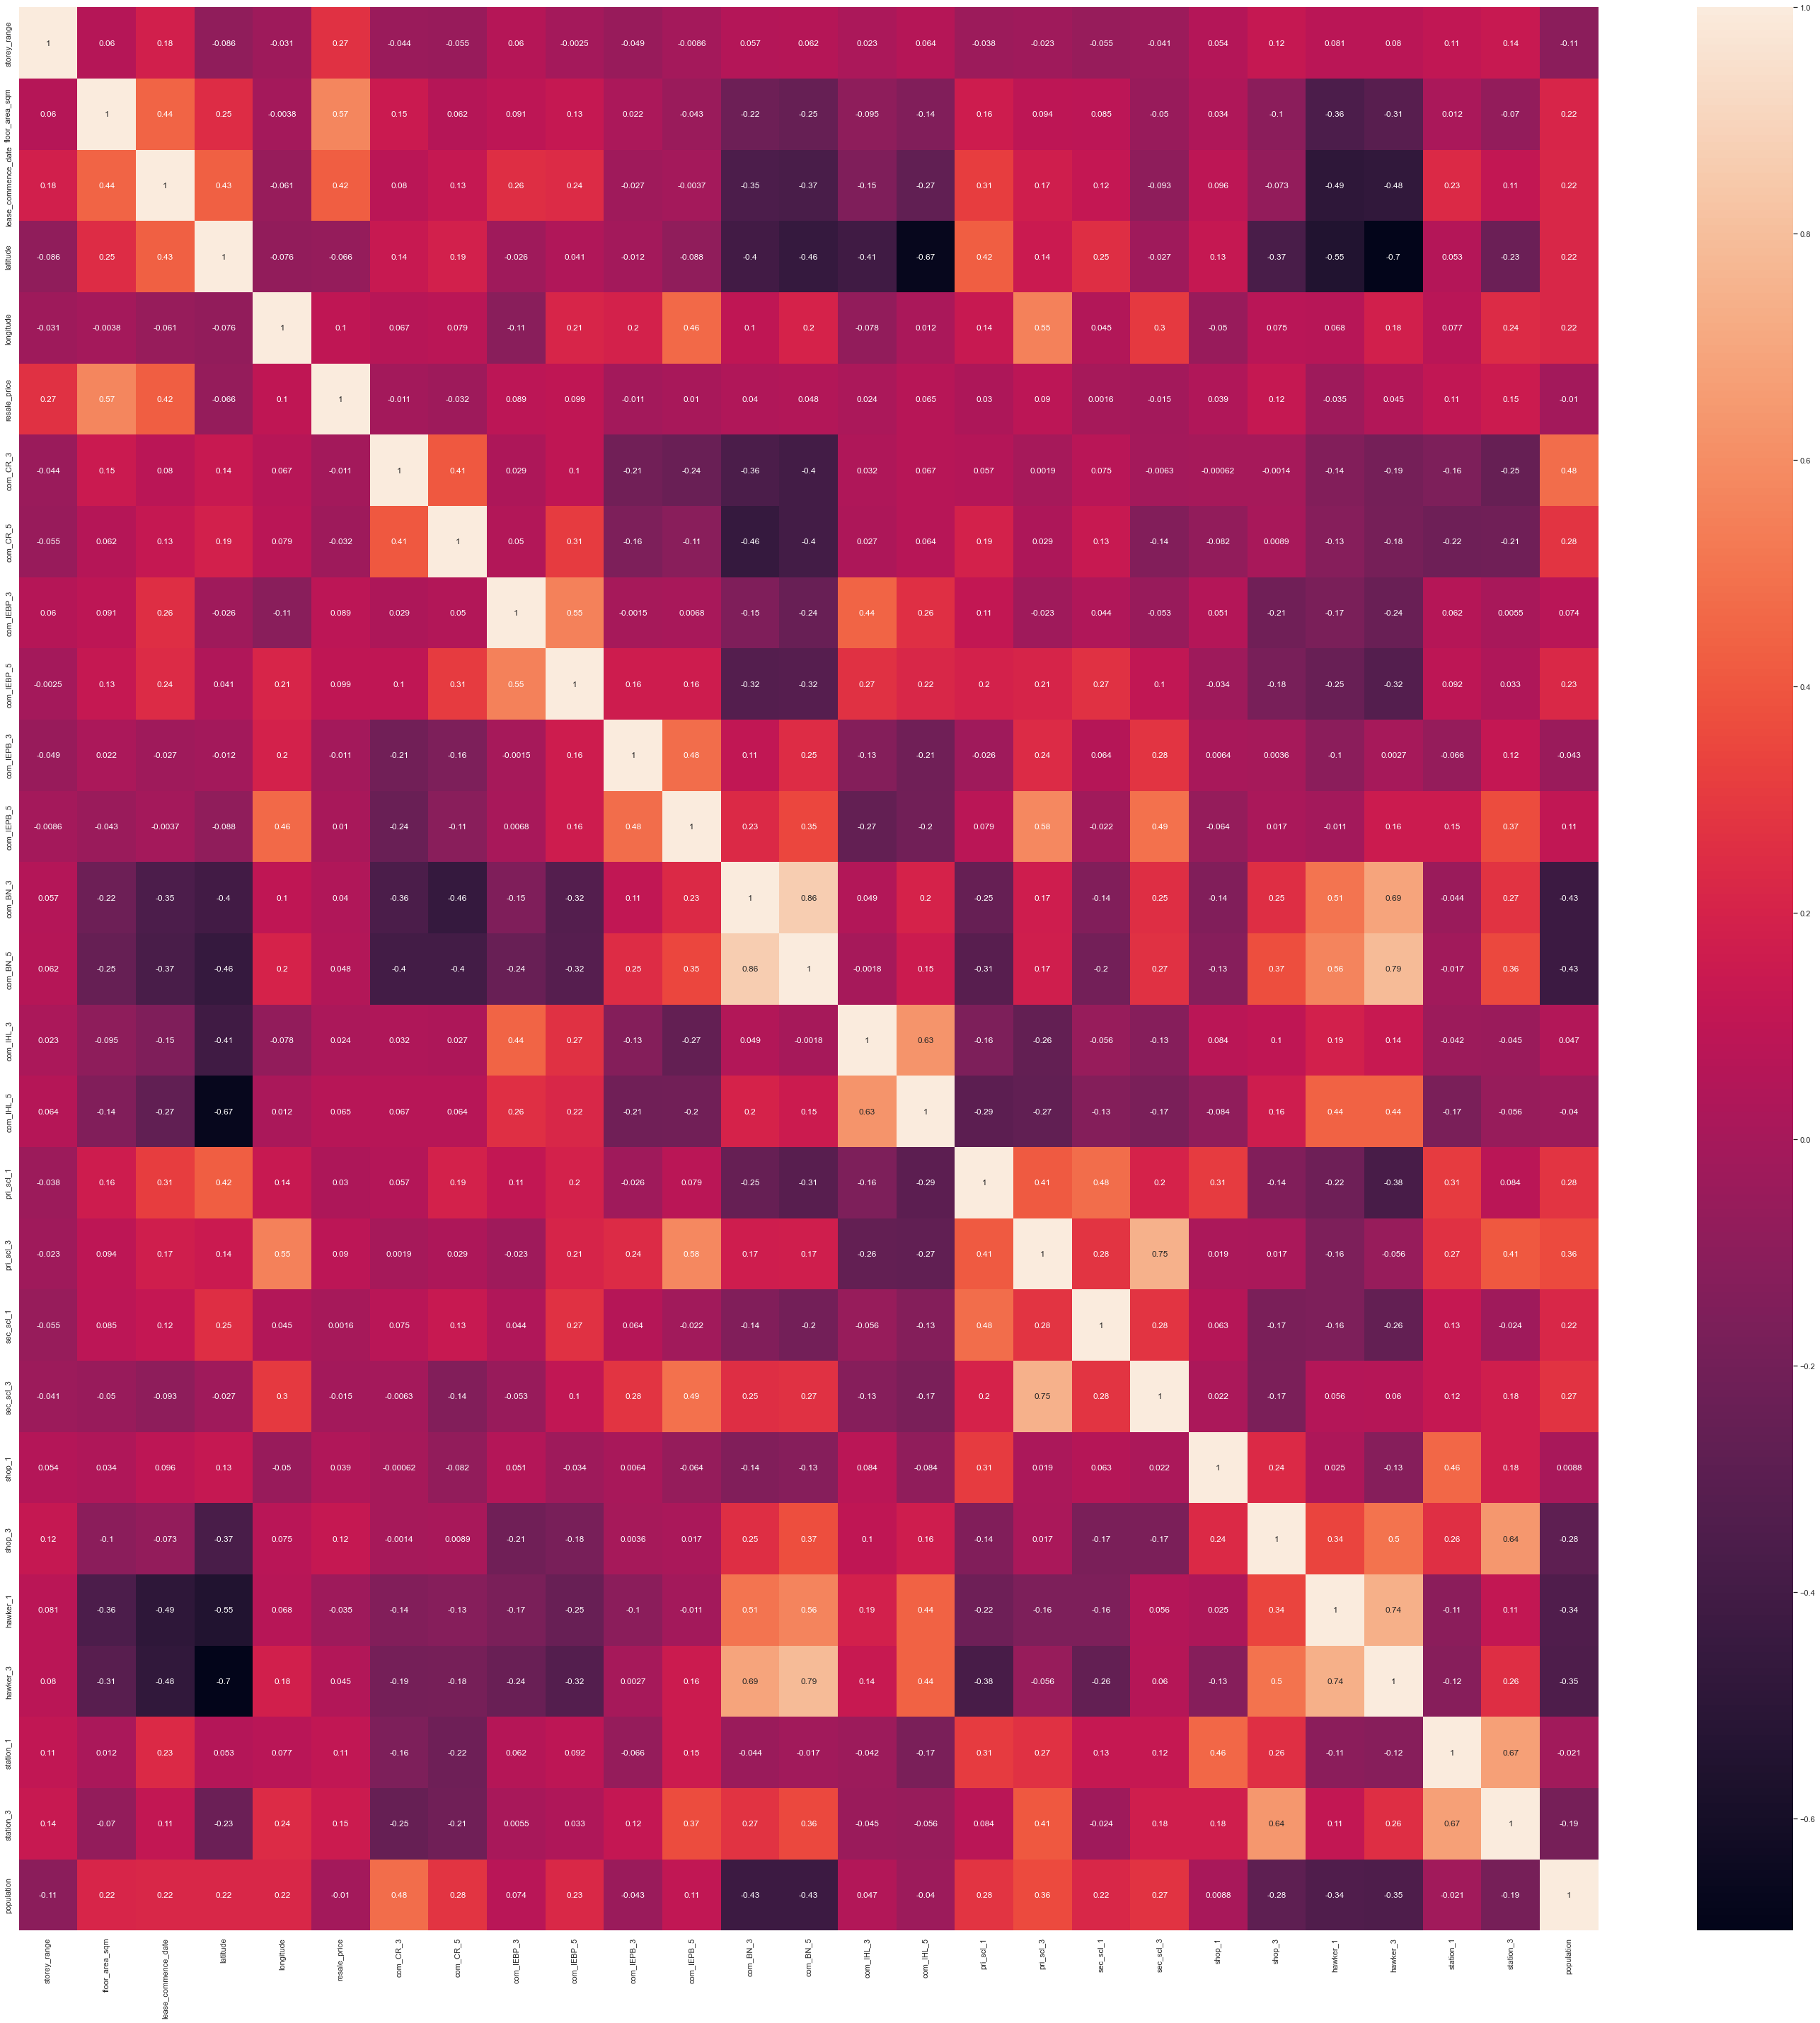

In [77]:
#correlation matrix
corrMatrix = df_train9.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corrMatrix, annot=True)
plt.show()

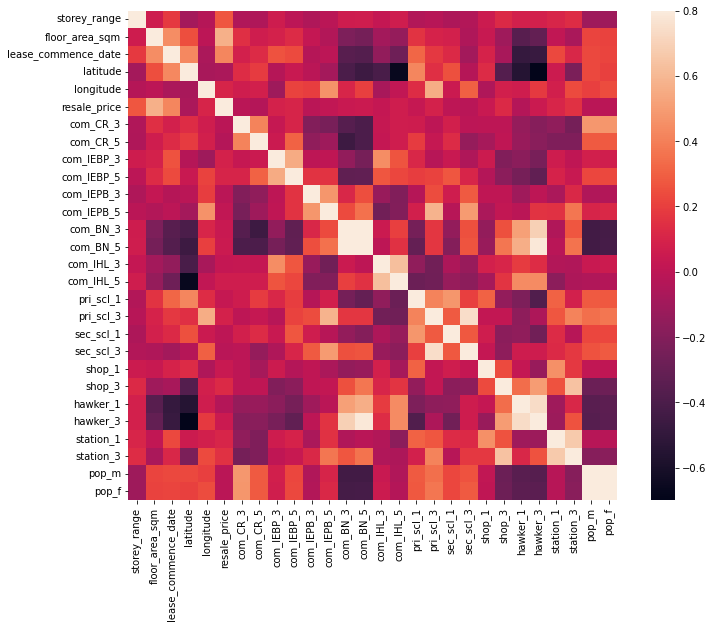

In [36]:
#correlation matrix
corrmat = df_train9.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

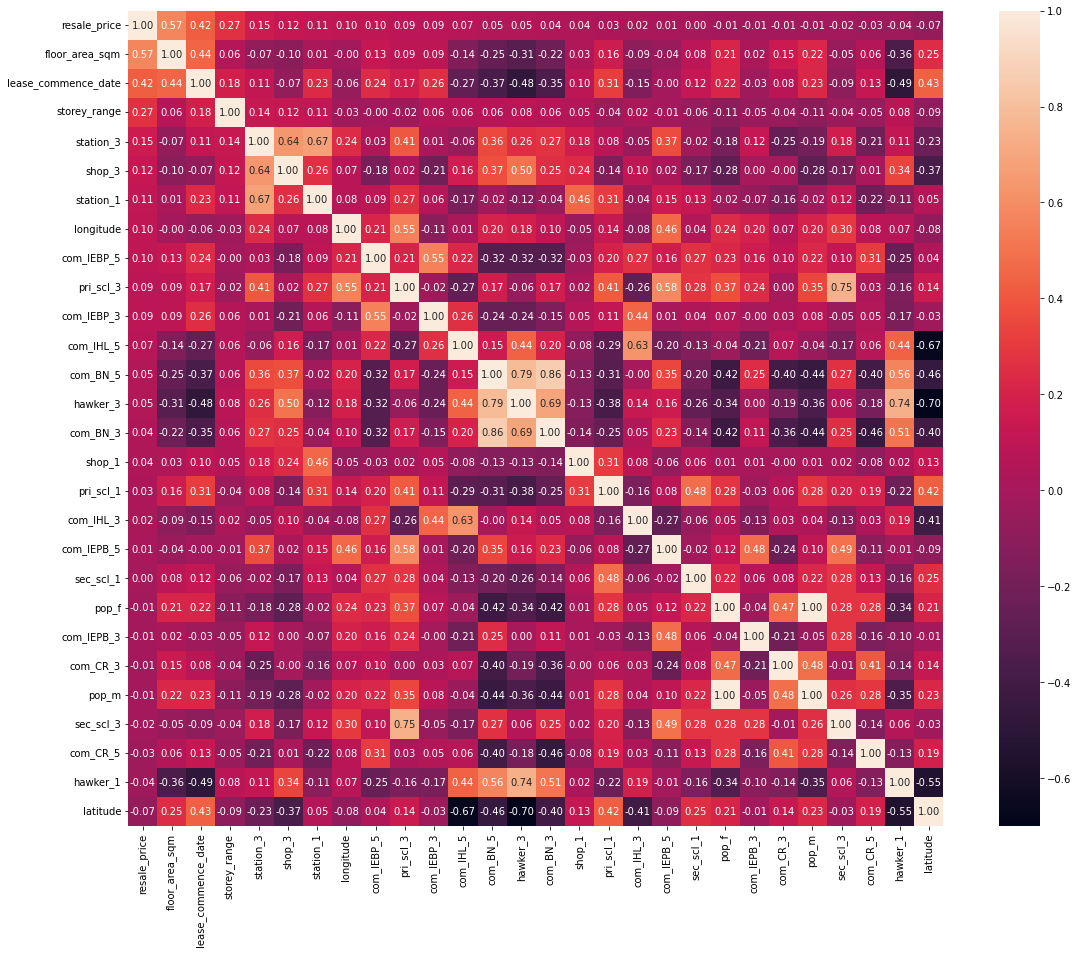

In [37]:
#resaleprice correlation matrix
k = 37 #number of variables for heatmap
cols = corrmat.nlargest(k, 'resale_price')['resale_price'].index
f, ax = plt.subplots(figsize=(20, 15))
cm = np.corrcoef(df_train9[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

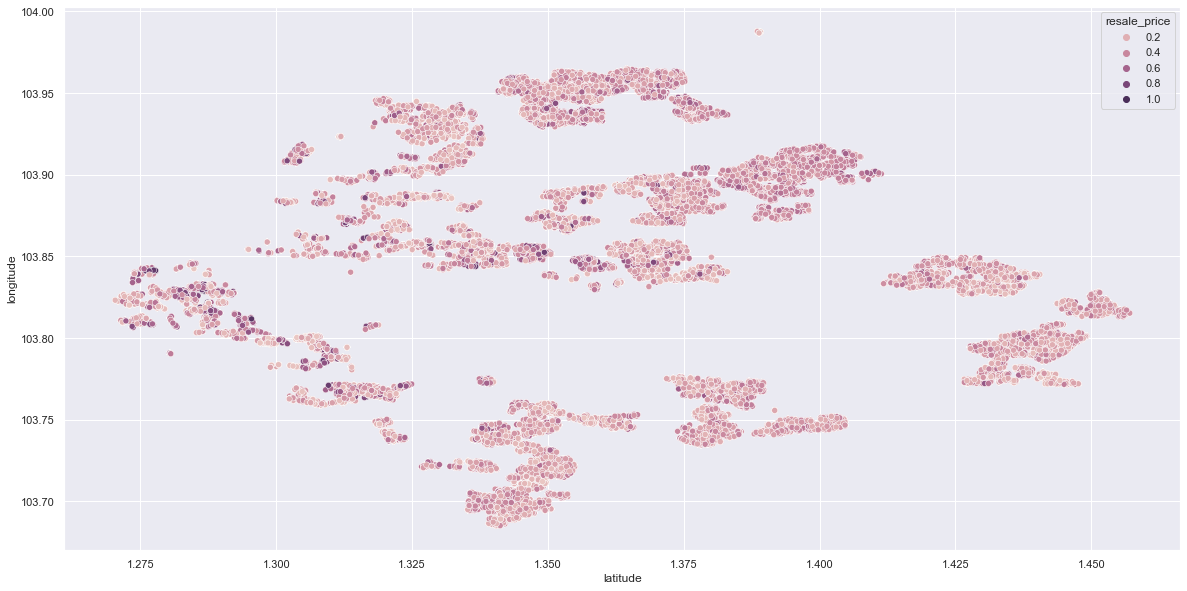

In [46]:
var = 'resale_price'
data = pd.concat([df_train9['latitude'], df_train9['longitude'], df_train9[var]], axis=1)
sns.set_style(style='whitegrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=data, x='latitude', y='longitude', hue=var)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

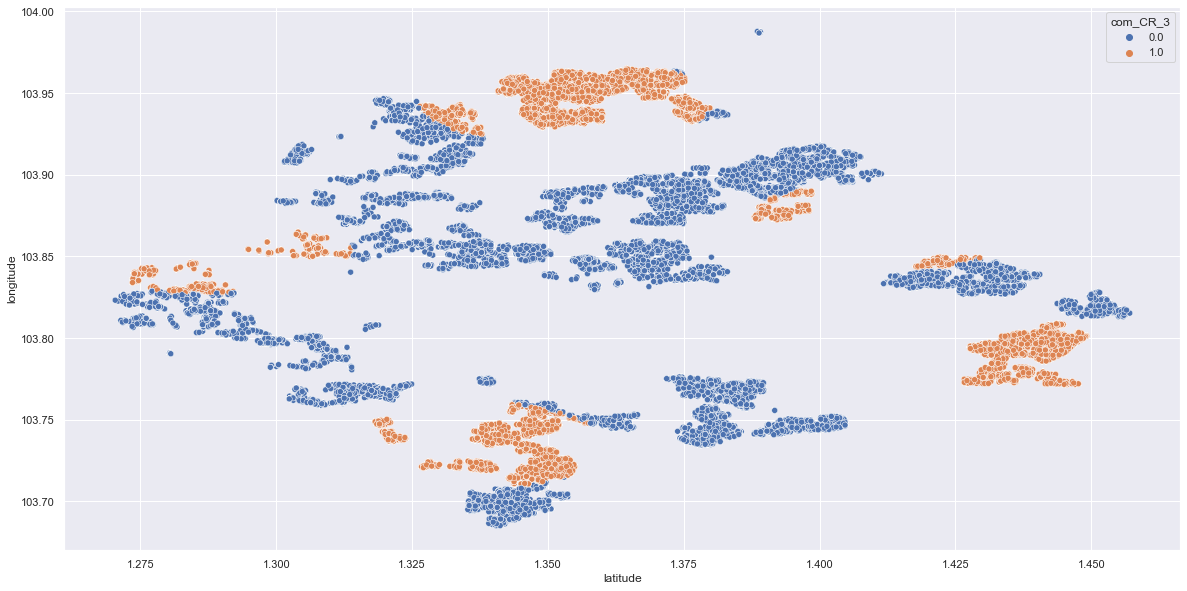

In [47]:
var = 'com_CR_3'
data = pd.concat([df_train9['latitude'], df_train9['longitude'], df_train9[var]], axis=1)
sns.set_style(style='whitegrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=data, x='latitude', y='longitude', hue=var)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

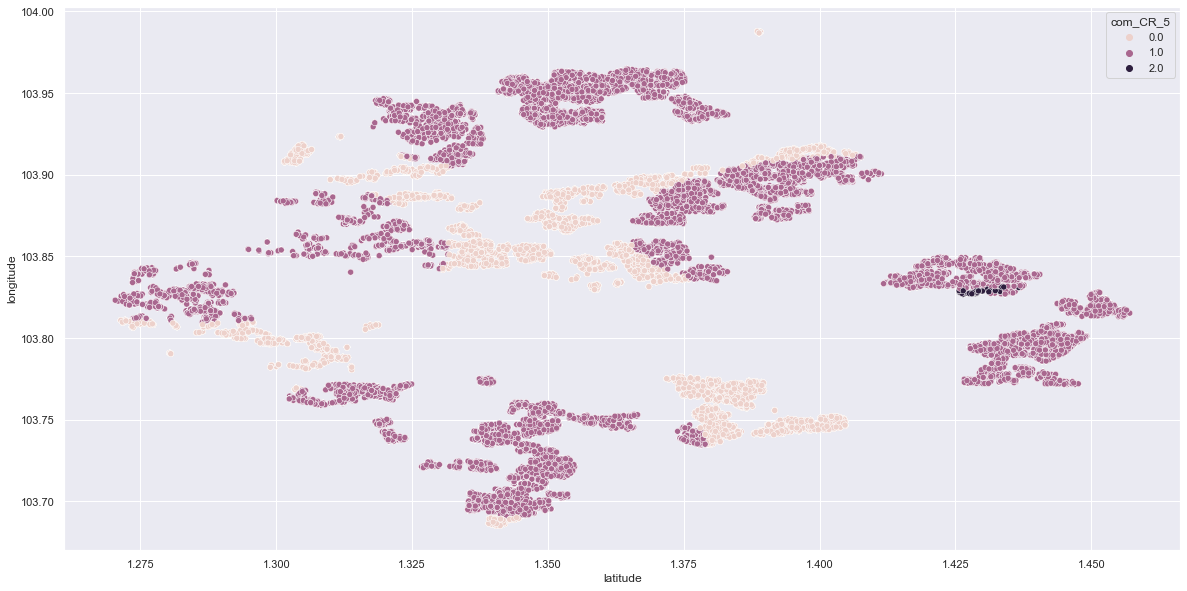

In [48]:
var = 'com_CR_5'
data = pd.concat([df_train9['latitude'], df_train9['longitude'], df_train9[var]], axis=1)
sns.set_style(style='whitegrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=data, x='latitude', y='longitude', hue=var)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

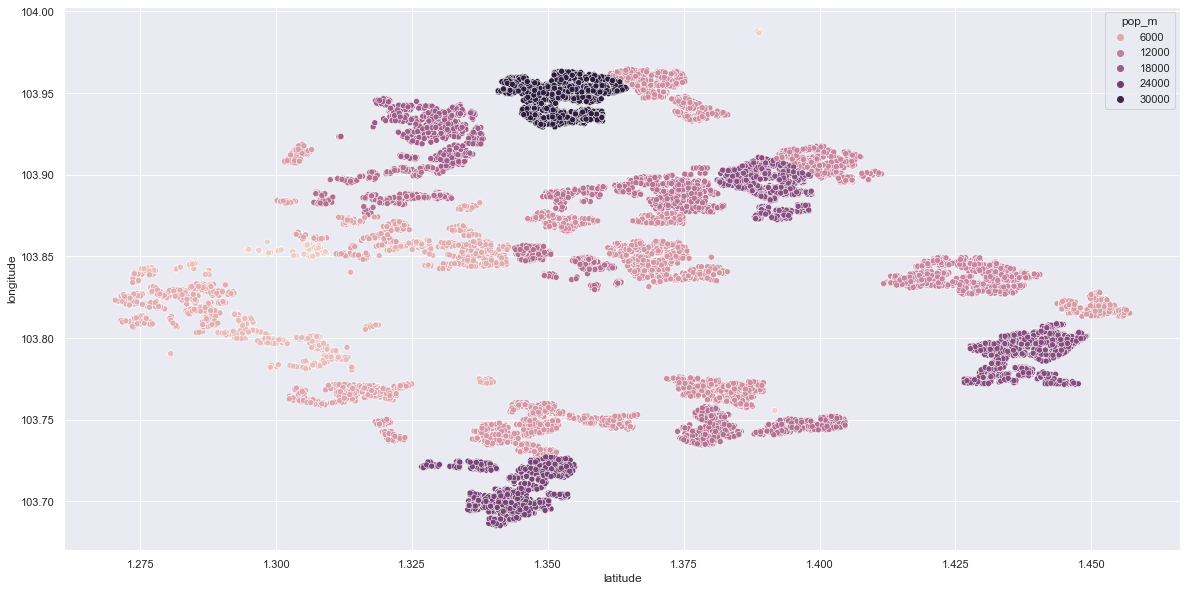

In [49]:
var = 'pop_m'
data = pd.concat([df_train9['latitude'], df_train9['longitude'], df_train9[var]], axis=1)
sns.set_style(style='whitegrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=data, x='latitude', y='longitude', hue=var)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

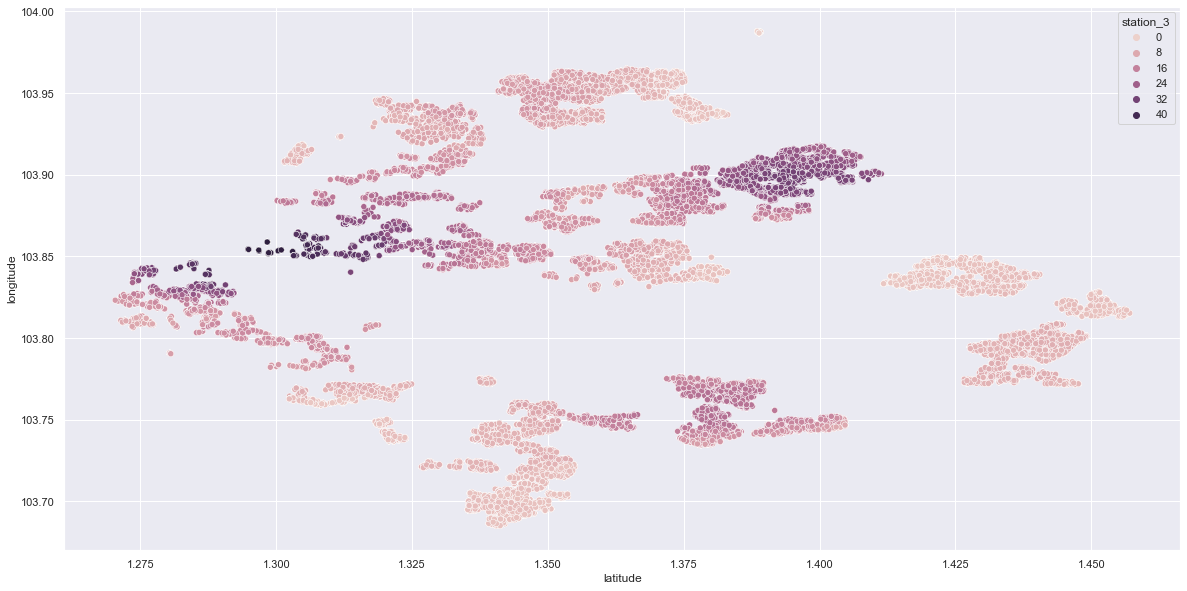

In [50]:
var = 'station_3'
data = pd.concat([df_train9['latitude'], df_train9['longitude'], df_train9[var]], axis=1)
sns.set_style(style='whitegrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=data, x='latitude', y='longitude', hue=var)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

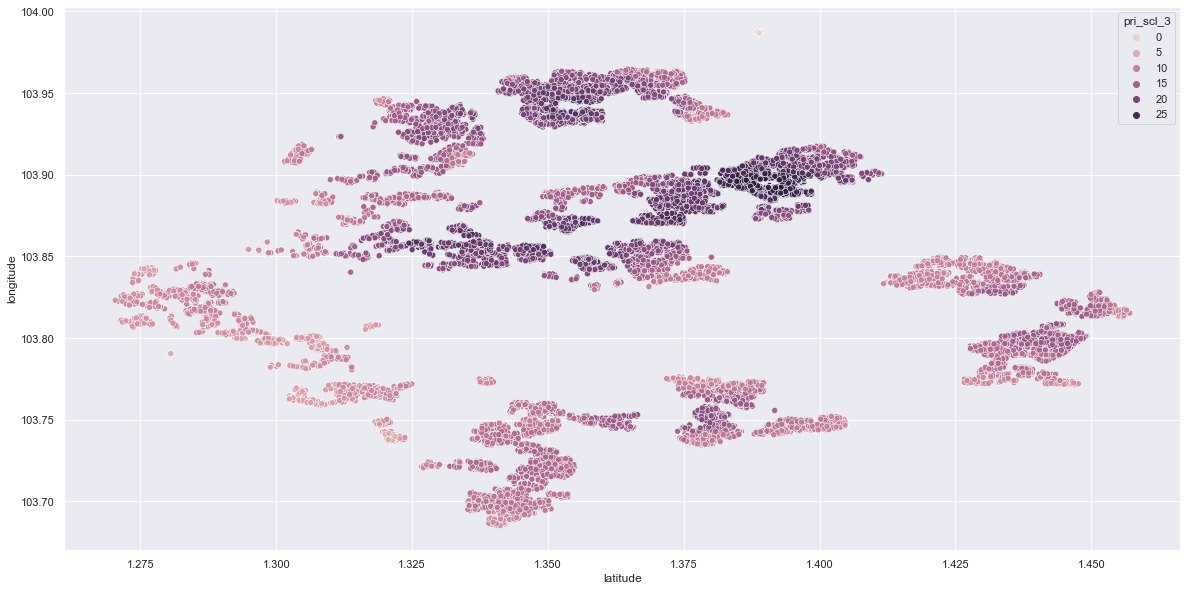

In [51]:
var = 'pri_scl_3'
data = pd.concat([df_train9['latitude'], df_train9['longitude'], df_train9[var]], axis=1)
sns.set_style(style='whitegrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=data, x='latitude', y='longitude', hue=var)